### Capstone Project

##### Author: Guntaas Kaur
##### Contact: guntaaskaur1@gmail.com
##### Date: 11-03-2024

## Introduction
<b>Predicting Small Businesses Success & Failure </b><br>
Understanding the Reasons Behind Small Business Failures and Leveraging Machine Learning for Enhanced Success

Data Dictionary
| Data         | Field        | Description                                      |
|--------------|--------------|--------------------------------------------------|
| Businesses   | Business ID  | Unique identifier for each business.             |
|              | Name         | Name of the business.                            |
|              | Address      | Address of the business.                         |
|              | City         | The city where the business is located.          |
|              | State        | State where the business is located.             |
|              | Postal Code  | Postal code of the business.                     |
|              | Latitude     | Latitude coordinates of the business location.   |
|              | Longitude    | Longitude coordinate of the business location.   |
|              | Stars        | Average rating of the business.                  |
|              | Review Count | Number of reviews the business has received.     |
|              | Is Open      | Indicates if the business is currently open (1 for open, 0 for closed). |
|              | Attributes   | Additional attributes or features of the business. |
|              | Categories   | Categories or types of services offered by the business. |
|              | Hours        | Operating hours of the business.                 |
| Reviews      | Review ID    | Unique identifier for each review.               |
|              | User ID      | Unique identifier for the user who wrote the review. |
|              | Business ID  | Unique identifier for the business being reviewed. |
|              | Stars        | Rating given by the user (1 to 5 stars).         |
|              | Text         | The text content of the review.                  |
|              | Date         | The date when the review was written.            |
| Users        | User ID      | Unique identifier for each user.                 |
|              | Name         | User's name.                                     |
|              | Review Count | Number of reviews written by the user.           |
|              | Average Stars| Average rating given by the user.                |
|              | Yelper Since | Date when the user joined Yelp.                  |
| Tips         | User ID      | Unique identifier for the user who wrote the tip. |
|              | Business ID  | Unique identifier for the business the tip is about. |
|              | Text         | The text content of the tip.                     |
|              | Date         | The date when the tip was written.               |
| Checkin      | Business_id  | Unique identifier for each business.             |
|              | Date         | Timestamps indicating the dates and times associated with checkins on business.|



<b>Target: Is_open<b>

---
### <a id="BasicAnalysis"> Part 1 Basic Analysis</a>
---

In [1]:
#importing required libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
businesses = pd.read_json("data/yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=150243)

# read the data 
for business in businesses:
    df_business = business
    break

In [3]:
reviews = pd.read_json('data/yelp_academic_dataset_review.json', lines = True, chunksize=10000)

for review in reviews:
    df_review = review
    break
      

In [4]:
checkins = pd.read_json('data/yelp_academic_dataset_checkin.json', lines = True, chunksize = 10000)

for checkin in checkins:
    df_checkin = checkin
    break

In [5]:
#users = pd.read_json('data/yelp_academic_dataset_user.json', lines = True, chunksize = 5000000)
    
#for user in users:
 #   df_user = user
 #   break

In [6]:
# Let's give a look at the data:
display(df_business.head(2))
display(df_review.head(2))
#display(df_user.head(2))
display(df_checkin.head(2))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."


In [7]:
print("Business :",df_business.shape)
print("Review :",df_review.shape)
#print("User :",df_user.shape)
print("Checkin :",df_checkin.shape)

Business : (150243, 14)
Review : (10000, 9)
Checkin : (10000, 2)


In [8]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150243 entries, 0 to 150242
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150243 non-null  object 
 1   name          150243 non-null  object 
 2   address       150243 non-null  object 
 3   city          150243 non-null  object 
 4   state         150243 non-null  object 
 5   postal_code   150243 non-null  object 
 6   latitude      150243 non-null  float64
 7   longitude     150243 non-null  float64
 8   stars         150243 non-null  float64
 9   review_count  150243 non-null  int64  
 10  is_open       150243 non-null  int64  
 11  attributes    136507 non-null  object 
 12  categories    150140 non-null  object 
 13  hours         127038 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.0+ MB


<b>Flattening Nested Structures:</b>
The dataset contains nested dictionaries and JSON-like structures, had to flatten them into string representations to create flat feature vectors suitable for modeling.
First, we will convert hours to string then extract day and time, later we will convert time to timestamp.

In [9]:
one_row = df_business.iloc[1]

print(one_row)

business_id                                mpf3x-BjTdTEA3yCZrAYPw
name                                                The UPS Store
address                           87 Grasso Plaza Shopping Center
city                                                       Affton
state                                                          MO
postal_code                                                 63123
latitude                                                38.551126
longitude                                              -90.335695
stars                                                         3.0
review_count                                                   15
is_open                                                         1
attributes                 {'BusinessAcceptsCreditCards': 'True'}
categories      Shipping Centers, Local Services, Notaries, Ma...
hours           {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
Name: 1, dtype: object


<b>Size and Structure: 
    The DataFrame contains 150,346 rows and 16 columns(after feature engineering).

Data Types: 
    The columns contain a mix of data types:

3 columns are of type float64.
2 columns are of type int64.
9 columns are of type object (likely strings).
Missing Values: Some columns have missing values:

The 'attributes','categories' and 'hours' column has missing values.

In [102]:
df_business.head().T

,0,1,2,3,4
business_id,Pns2l4eNsfO8kk83dixA6A,mpf3x-BjTdTEA3yCZrAYPw,tUFrWirKiKi_TAnsVWINQQ,MTSW4McQd7CbVtyjqoe9mw,mWMc6_wTdE0EUBKIGXDVfA
name,"Abby Rappoport, LAC, CMQ",The UPS Store,Target,St Honore Pastries,Perkiomen Valley Brewery
city,Santa Barbara,Affton,Tucson,Philadelphia,Green Lane
state,CA,MO,AZ,PA,PA
postal_code,93101,63123,85711,19107,18054
...,...,...,...,...,...
address_ave,0,0,0,0,0
address_hwy,0,0,0,0,0
address_boulevard,0,0,1,0,0
address_road,0,0,1,0,0


In [11]:
df_business['state'].value_counts()

state
PA     34017
FL     26318
TN     12047
IN     11239
MO     10905
LA      9920
AZ      9901
NJ      8530
NV      7712
AB      5566
CA      5198
ID      4462
DE      2263
IL      2144
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

PA: Pennsylvania
FL: Florida
TN: Tennessee
IN: Indiana
MO: Missouri
LA: Louisiana
AZ: Arizona
NJ: New Jersey
NV: Nevada
AB: Alberta (This is a Canadian province, not a U.S. state)
CA: California
ID: Idaho
DE: Delaware
IL: Illinois
TX: Texas
CO: Colorado
WA: Washington
HI: Hawaii
MA: Massachusetts
NC: North Carolina
UT: Utah
MT: Montana
MI: Michigan
SD: South Dakota
XMS: This abbreviation is not recognized as a U.S. state or Canadian province abbreviation.
VI: Virgin Islands (This is a territory of the United States, not a state)
VT: Vermont

In [12]:
df_business_subset=df_business.drop(columns=['attributes','categories','hours'])

In [13]:
df_business_subset.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1


### Removing Duplicates

In [14]:
df_business_subset.duplicated().sum()

0

Empty dataset specifies that there are no duplicate values in specified columns

In [15]:
df_business_subset.isna().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
dtype: int64

### Removing Null Values

In [16]:
df_business['categories'].str.contains('restaurant').value_counts()

categories
False    150140
Name: count, dtype: int64

In [17]:
df_business['categories'].isna().sum()

103

In [18]:
df_business['categories'].isna().mean()*100

0.06855560658400059

The percentage of null for categories is much smaller. For the <3% missing columns so we can remove those rows.

In [19]:
df_business.dropna(subset=['categories'], inplace=True)


In [20]:
df_business['categories'].isna().sum()

0

For the attributes, hours columns it may be worth imputing these values as dropping 15.37% and 9.02% of rows may be too much data loss.

In [21]:
#making everything lower case + remove punctuation
df_business['address'] = df_business['address'].str.lower()

df_business['address'] = df_business['address'].str.replace('[^\w\s]','')

In [22]:
df_business['address'].head(10)

0                        1616 chapala st, ste 2
1               87 grasso plaza shopping center
2                          5255 e broadway blvd
3                                   935 race st
4                                 101 walnut st
5                                 615 s main st
6    8522 eager road, dierbergs brentwood point
7                            400 pasadena ave s
8                             8025 mackenzie rd
9                           2312 dickerson pike
Name: address, dtype: object

In [23]:
df_business=df_business.dropna(subset=['categories',],axis=0)

### Hours

In [24]:
df_business.isna().mean()*100

business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.000000
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes       9.080858
categories       0.000000
hours           15.386972
dtype: float64

In [25]:
df_business['hours'].head()

0                                                 None
1    {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2    {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4    {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
Name: hours, dtype: object

In [26]:
#split out the dict
hours_day_df = df_business['hours'].apply(pd.Series)
# Display the DataFrame after conversion
print(hours_day_df.head())

     Monday    Tuesday  Wednesday   Thursday     Friday   Saturday     Sunday
0       NaN        NaN        NaN        NaN        NaN        NaN        NaN
1   0:0-0:0  8:0-18:30  8:0-18:30  8:0-18:30  8:0-18:30   8:0-14:0        NaN
2  8:0-22:0   8:0-22:0   8:0-22:0   8:0-22:0   8:0-23:0   8:0-23:0   8:0-22:0
3  7:0-20:0   7:0-20:0   7:0-20:0   7:0-20:0   7:0-21:0   7:0-21:0   7:0-21:0
4       NaN        NaN  14:0-22:0  16:0-22:0  12:0-22:0  12:0-22:0  12:0-18:0


In [27]:
hours_day_df.dtypes

Monday       object
Tuesday      object
Wednesday    object
Thursday     object
Friday       object
Saturday     object
Sunday       object
dtype: object

In [28]:
# Replace specific text values with NaT
hours_day_df['Monday'] = hours_day_df['Monday'].replace({'nan': 'NaT'})

# Print the unique values in the 'Monday' column
print(hours_day_df['Monday'].unique())

[nan '0:0-0:0' '8:0-22:0' ... '8:0-1:45' '7:30-19:45' '20:0-4:0']


In [29]:
# Replace NaN values with an empty string
hours_day_df.fillna('', inplace=True)
hours_day_df.value_counts()

Monday     Tuesday    Wednesday  Thursday   Friday     Saturday   Sunday   
                                                                               23102
0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0       6787
8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0                            2015
9:0-17:0   9:0-17:0   9:0-17:0   9:0-17:0   9:0-17:0                            1598
11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0      621
                                                                               ...  
0:0-0:0    8:0-18:0   11:0-19:0  8:0-18:0                                          1
                      12:0-20:0  8:0-18:0   12:0-20:0  12:0-20:0  12:0-20:0        1
                      2:0-18:0   8:0-18:0                                          1
                      7:0-12:0   8:0-18:0   7:0-17:0   12:0-19:0                   1
9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  10:0-17:

In [30]:
# Replace NaN values with an empty string
hours_day_df.fillna('', inplace=True)

# Create new columns for open and close times for each day
for day in ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    hours_day_df[day] = hours_day_df[day].replace({'none': pd.NaT})
    hours_day_df[[f'{day}_open', f'{day}_close']] = hours_day_df[day].str.split('-', expand=True)
    # Converting 'start_time' and 'end_time' columns to datetime
    hours_day_df[f'{day}_open'] = pd.to_datetime(hours_day_df[f'{day}_open'], format='%H:%M')
    hours_day_df[f'{day}_close'] = pd.to_datetime(hours_day_df[f'{day}_close'], format='%H:%M')                
                 
                 
hours_day_df.drop(columns=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],inplace=True)
# Display the DataFrame with new open and close columns
print(hours_day_df)


               Monday_open        Monday_close        Tuesday_open  \
0                      NaT                 NaT                 NaT   
1      1900-01-01 00:00:00 1900-01-01 00:00:00 1900-01-01 08:00:00   
2      1900-01-01 08:00:00 1900-01-01 22:00:00 1900-01-01 08:00:00   
3      1900-01-01 07:00:00 1900-01-01 20:00:00 1900-01-01 07:00:00   
4                      NaT                 NaT                 NaT   
...                    ...                 ...                 ...   
150238 1900-01-01 12:00:00 1900-01-01 21:00:00 1900-01-01 12:00:00   
150239                 NaT                 NaT                 NaT   
150240 1900-01-01 00:00:00 1900-01-01 00:00:00                 NaT   
150241                 NaT                 NaT                 NaT   
150242                 NaT                 NaT                 NaT   

             Tuesday_close      Wednesday_open     Wednesday_close  \
0                      NaT                 NaT                 NaT   
1      1900-01-01 1

In [31]:
hours_day_df.dtypes

Monday_open        datetime64[ns]
Monday_close       datetime64[ns]
Tuesday_open       datetime64[ns]
Tuesday_close      datetime64[ns]
Wednesday_open     datetime64[ns]
Wednesday_close    datetime64[ns]
Thursday_open      datetime64[ns]
Thursday_close     datetime64[ns]
Friday_open        datetime64[ns]
Friday_close       datetime64[ns]
Saturday_open      datetime64[ns]
Saturday_close     datetime64[ns]
Sunday_open        datetime64[ns]
Sunday_close       datetime64[ns]
dtype: object

In [32]:
mean_values = hours_day_df.mean()

for column in hours_day_df.columns:
    hours_day_df[column].fillna(mean_values[column], inplace=True)

In [33]:
hours_day_df.isna().mean()

Monday_open        0.0
Monday_close       0.0
Tuesday_open       0.0
Tuesday_close      0.0
Wednesday_open     0.0
Wednesday_close    0.0
Thursday_open      0.0
Thursday_close     0.0
Friday_open        0.0
Friday_close       0.0
Saturday_open      0.0
Saturday_close     0.0
Sunday_open        0.0
Sunday_close       0.0
dtype: float64

In [34]:
# Calculate the mean of each column
mean_values = hours_day_df.mean()

# Replace NaN values with the mean of each column
hours_day_df.fillna(mean_values, inplace=True)

In [35]:
#key for reference
hours_day_df['business_id'] = df_business['business_id']

In [36]:
df_business.drop(columns='hours',inplace=True)

In [37]:
df_business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
dtype: object

In [38]:
df_business = pd.concat([df_business, hours_day_df], axis=1)

# Display the combined DataFrame
print(df_business.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 chapala st, ste 2  Santa Barbara    CA       93101   
1  87 grasso plaza shopping center         Affton    MO       63123   
2             5255 e broadway blvd         Tucson    AZ       85711   
3                      935 race st   Philadelphia    PA       19107   
4                    101 walnut st     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  ...  \
0  34.426679 -119.711197    5.0             7  ...   
1  38.551126  -90.335695    3.0            15  ...   
2  32.223236 -110.880452    3.5            22  ...   
3  39.955505  -75.155564  

In [39]:
df_business.isna().sum()

business_id            0
name                   0
address                0
city                   0
state                  0
postal_code            0
latitude               0
longitude              0
stars                  0
review_count           0
is_open                0
attributes         13634
categories             0
Monday_open            0
Monday_close           0
Tuesday_open           0
Tuesday_close          0
Wednesday_open         0
Wednesday_close        0
Thursday_open          0
Thursday_close         0
Friday_open            0
Friday_close           0
Saturday_open          0
Saturday_close         0
Sunday_open            0
Sunday_close           0
business_id            0
dtype: int64

### Attributes

In [40]:
# Replace NaN values in the 'attributes' column with an empty dictionary as there is no possibility of filling with any other values.
df_business['attributes'].fillna('{}', inplace=True)

In [41]:
#break up dict inside df
df_atr = df_business['attributes'].apply(pd.Series)
df_atr.head(10)

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,True,False,1,False,True,True,False,u'no',None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,True,True,2,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,True,NaN,1,NaN,True,False,True,u'free',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,True,NaN,1,False,True,True,False,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_business['attributes'].head(10)


0                        {'ByAppointmentOnly': 'True'}
1               {'BusinessAcceptsCreditCards': 'True'}
2    {'BikeParking': 'True', 'BusinessAcceptsCredit...
3    {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4    {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
5    {'BusinessParking': 'None', 'BusinessAcceptsCr...
6    {'BusinessAcceptsCreditCards': 'True', 'Restau...
7                                                   {}
8    {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...
9    {'RestaurantsAttire': ''casual'', 'Restaurants...
Name: attributes, dtype: object

In [43]:
#inspect types
df_atr.dtypes

ByAppointmentOnly             object
BusinessAcceptsCreditCards    object
BikeParking                   object
RestaurantsPriceRange2        object
CoatCheck                     object
RestaurantsTakeOut            object
RestaurantsDelivery           object
Caters                        object
WiFi                          object
BusinessParking               object
WheelchairAccessible          object
HappyHour                     object
OutdoorSeating                object
HasTV                         object
RestaurantsReservations       object
DogsAllowed                   object
Alcohol                       object
GoodForKids                   object
RestaurantsAttire             object
Ambience                      object
RestaurantsTableService       object
RestaurantsGoodForGroups      object
DriveThru                     object
0                             object
NoiseLevel                    object
GoodForMeal                   object
BusinessAcceptsBitcoin        object
S

In [44]:
#select cols that are still as objects
df_atr_obj_cols = df_atr.select_dtypes(include='object').columns
print(df_atr_obj_cols)

Index([         'ByAppointmentOnly', 'BusinessAcceptsCreditCards',
                      'BikeParking',     'RestaurantsPriceRange2',
                        'CoatCheck',         'RestaurantsTakeOut',
              'RestaurantsDelivery',                     'Caters',
                             'WiFi',            'BusinessParking',
             'WheelchairAccessible',                  'HappyHour',
                   'OutdoorSeating',                      'HasTV',
          'RestaurantsReservations',                'DogsAllowed',
                          'Alcohol',                'GoodForKids',
                'RestaurantsAttire',                   'Ambience',
          'RestaurantsTableService',   'RestaurantsGoodForGroups',
                        'DriveThru',                            0,
                       'NoiseLevel',                'GoodForMeal',
           'BusinessAcceptsBitcoin',                    'Smoking',
                            'Music',             'GoodForDanci

In [45]:
def str_dict_to_df(series):
    """
    Takes in a pandas series with dicts stored as strings
    returns dataframe with dict keys as columns
    
    serires: pandas series
    """
    eval_list = []
    for sr in series:
        if not pd.isna(sr):
            eval_list.append(eval(sr))
        else:
            eval_list.append(np.nan)
    
    eval_df = pd.Series(eval_list).apply(pd.Series)  
    
    #drop cols that are all nan
    eval_df = eval_df.dropna(axis=1, how='all')
    
    
    return eval_df

In [46]:
#store col names
dict_cols_list = []

for col in df_atr_obj_cols:
    #if contains a curly bracket, then assume column is a dict as string
    if df_atr[col].str.contains('{').any():
        dict_cols_list.append(col)
print(dict_cols_list)  

['BusinessParking', 'Ambience', 0, 'GoodForMeal', 'Music', 'BestNights', 'HairSpecializesIn', 'DietaryRestrictions']


In [47]:
#store dataframes from dict nested columns
dict_col_df_list = []

for col in dict_cols_list:
    #apply string to dict evaluation
    temp_df = str_dict_to_df(df_atr[col])
    #append to list
    dict_col_df_list.append(temp_df)

#combine all in one column
dict_col_df = pd.concat(dict_col_df_list, axis=1)
dict_col_df.head()

,garage,street,validated,lot,valet,romantic,intimate,touristy,hipster,divey,...,kids,perms,asian,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,True,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#store dummy attribute columns in list
atr_dum_df_cols = []

#iterate over object columns
for col in df_atr_obj_cols:
    #if contains a categorical variable then it begins with a u
    if df_atr[col].str.contains("u'").any():
        #add to the list
        atr_dum_df_cols.append(col)

#print out list
print(atr_dum_df_cols)

['WiFi', 'BusinessParking', 'Alcohol', 'RestaurantsAttire', 'Ambience', 'NoiseLevel', 'GoodForMeal', 'Smoking', 'Music', 'BestNights', 'BYOBCorkage', 'HairSpecializesIn', 'AgesAllowed']


In [ ]:
#explore unique entries in attribute columns
for col in atr_dum_df_cols:
    print(col)
    print(df_atr[col].unique())
    print(50*'-')

Creation of a mapping dictionary attire_mapping to assign numerical values to attire categories.
Use of the map() function to replace categorical values with numerical values based on the mapping dictionary.
Display of the original 'attire' column alongside the new 'attire_numerical' column to demonstrate the transformation.

In [50]:
#noise level
noise_level_dict = dict(zip([np.nan, "u'loud'" ,"u'average'" ,
                             "'average'" ,"u'quiet'" ,"'loud'" ,
                             "'very_loud'", "'quiet'" ,"u'very_loud'" ,'None'], 
                            [0, 3, 2, 
                             2, 1, 3, 
                             4, 1 , 4, 0]))
print(noise_level_dict)

{nan: 0, "u'loud'": 3, "u'average'": 2, "'average'": 2, "u'quiet'": 1, "'loud'": 3, "'very_loud'": 4, "'quiet'": 1, "u'very_loud'": 4, 'None': 0}


In [51]:
#free wifi is the best kind of wifi
wifi_dict = dict(zip(
    [np.nan ,"u'no'" ,"'free'" ,
     "u'free'" ,"'no'" ,"u'paid'" ,"'paid'" ,'None'], 
    [0, 1, 3, 
     3, 1, 2, 2, 0]))
print(wifi_dict)

{nan: 0, "u'no'": 1, "'free'": 3, "u'free'": 3, "'no'": 1, "u'paid'": 2, "'paid'": 2, 'None': 0}


In [52]:
#more alcohol is better
alcohol_dict = dict(zip([np.nan ,"u'full_bar'" ,"u'beer_and_wine'" ,
                         "u'none'" ,"'beer_and_wine'" ,"'none'", 
                         "'full_bar'" ,'None'],
                        [0, 2, 1, 
                         0, 1, 0, 
                         2, 0]))
print(alcohol_dict)

{nan: 0, "u'full_bar'": 2, "u'beer_and_wine'": 1, "u'none'": 0, "'beer_and_wine'": 1, "'none'": 0, "'full_bar'": 2, 'None': 0}


In [53]:
#rank by formality
restaurant_attire_dict = dict(zip(
    [np.nan ,"u'casual'" ,"'casual'" ,
     "'dressy'" ,"u'dressy'" ,"u'formal'" ,
     'None',"'formal'"], 
    [0, 1, 1, 
     2, 2, 3, 
     0, 3]))
print(restaurant_attire_dict)

{nan: 0, "u'casual'": 1, "'casual'": 1, "'dressy'": 2, "u'dressy'": 2, "u'formal'": 3, 'None': 0, "'formal'": 3}


In [54]:
#free corkage is best
byob_corkage_dict = dict(zip(
    [np.nan ,"'no'" ,"'yes_corkage'" ,
     "'yes_free'" ,"u'no'" ,"u'yes_free'","u'yes_corkage'"],
    [0, 1, 2, 
     3, 1, 3, 2]))
print(byob_corkage_dict)

{nan: 0, "'no'": 1, "'yes_corkage'": 2, "'yes_free'": 3, "u'no'": 1, "u'yes_free'": 3, "u'yes_corkage'": 2}


In [55]:
#from least to most accomodating for smokers
smoking_dict = dict(zip(
    [np.nan ,"u'no'" ,"u'outdoor'" ,
     "u'yes'" ,"'no'" ,'None' ,
     "'outdoor'" ,"'yes'"], 
    [0, 1, 2, 
     3, 1, 0, 
     2, 3]))
print(smoking_dict)

{nan: 0, "u'no'": 1, "u'outdoor'": 2, "u'yes'": 3, "'no'": 1, 'None': 0, "'outdoor'": 2, "'yes'": 3}


In [56]:
#from youngest to oldest crowd
ages_allowed_dict = dict(zip(
    [np.nan ,"u'allages'" ,"u'21plus'" ,
     "u'18plus'" ,"u'19plus'" ,'None'], 
    [0, 1, 4, 
     2, 3, 0]))
print(ages_allowed_dict)

{nan: 0, "u'allages'": 1, "u'21plus'": 4, "u'18plus'": 2, "u'19plus'": 3, 'None': 0}


In [57]:
#define mapping for replace method
atr_dict_map = {'NoiseLevel': noise_level_dict, 
                'WiFi': wifi_dict, 
                'Alcohol': alcohol_dict, 
                'RestaurantsAttire': restaurant_attire_dict, 
                'BYOBCorkage': byob_corkage_dict, 
                'Smoking': smoking_dict, 
                'AgesAllowed': ages_allowed_dict}

In [58]:
#get a copy with relevant columns
df_atr_categorical = df_atr[atr_dum_df_cols].copy()
#apply replacement
df_atr_categorical = df_atr_categorical.replace(atr_dict_map)

df_atr_categorical.head()

,WiFi,BusinessParking,Alcohol,RestaurantsAttire,Ambience,NoiseLevel,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,0,NaN,0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
1,0,NaN,0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
2,1,"{'garage': False, 'street': False, 'validated'...",0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
3,3,"{'garage': False, 'street': True, 'validated':...",0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
4,0,"{'garage': None, 'street': None, 'validated': ...",0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0


In [59]:
#add to the list
atr_to_drop =  dict_cols_list + list(df_atr_categorical.columns)
print(atr_to_drop)

['BusinessParking', 'Ambience', 0, 'GoodForMeal', 'Music', 'BestNights', 'HairSpecializesIn', 'DietaryRestrictions', 'WiFi', 'BusinessParking', 'Alcohol', 'RestaurantsAttire', 'Ambience', 'NoiseLevel', 'GoodForMeal', 'Smoking', 'Music', 'BestNights', 'BYOBCorkage', 'HairSpecializesIn', 'AgesAllowed']


In [60]:
# Define a dictionary to map boolean values to integers
bool_to_int = {True: 1, False: 0}


In [61]:
#combine features in one dataframes
df_atr_conc = pd.concat([df_atr.drop(columns=atr_to_drop),dict_col_df, df_atr_categorical], axis=1)

#standardize name
df_atr_conc.columns = df_atr_conc.columns.str.replace("-", "_")

#make 1/0
df_atr_conc = df_atr_conc.replace(bool_to_int)

df_atr_conc.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WheelchairAccessible,HappyHour,...,RestaurantsAttire,Ambience,NoiseLevel,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
2,False,True,True,2,False,False,False,False,True,False,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
3,False,False,True,1,NaN,True,False,True,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
4,NaN,True,True,NaN,NaN,True,NaN,False,True,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0


In [62]:
#quick check for column names
df_atr_conc.columns

Index(['ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WheelchairAccessible', 'HappyHour',
       'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed',
       'GoodForKids', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'DriveThru', 'BusinessAcceptsBitcoin', 'GoodForDancing',
       'AcceptsInsurance', 'BYOB', 'Corkage', 'Open24Hours',
       'RestaurantsCounterService', 'garage', 'street', 'validated', 'lot',
       'valet', 'romantic', 'intimate', 'touristy', 'hipster', 'divey',
       'classy', 'trendy', 'upscale', 'casual', 'dessert', 'latenight',
       'lunch', 'dinner', 'brunch', 'breakfast', 'dj', 'background_music',
       'no_music', 'jukebox', 'live', 'video', 'karaoke', 'monday', 'tuesday',
       'friday', 'wednesday', 'thursday', 'sunday', 'saturday',
       'straightperms', 'coloring', 'extensions', 'africanamerican

In [105]:

# Reset index of the DataFrame containing categorical information
df_atr_conc.reset_index(inplace=True)

# Merge the two DataFrames on the 'index' column
df_business = df_business.merge(df_atr_conc, left_index=True, right_index=True)

# Drop the redundant 'index' column after merging
df_business.drop(columns='index', inplace=True)


In [64]:
#save the work
df_atr_conc.to_csv(path_or_buf='data/cleaned/business_attributes.csv')

In [65]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open,Monday_open,Monday_close,Tuesday_open,Tuesday_close,Wednesday_open,Wednesday_close,Thursday_open,Thursday_close,Friday_open,Friday_close,Saturday_open,Saturday_close,Sunday_open,Sunday_close
count,150140.000000,150140.000000,150140.000000,150140.000000,150140.000000,150140,150140,150140,150140,150140,150140,150140,150140,150140,150140,150140,150140,150140,150140
mean,36.670776,-89.356774,3.597612,44.892594,0.796084,1900-01-01 06:51:16.616635136,1900-01-01 12:57:24.188294656,1900-01-01 09:00:01.003418112,1900-01-01 16:59:19.448187136,1900-01-01 09:05:16.437944320,1900-01-01 17:02:23.788595456,1900-01-01 09:07:56.632990208,1900-01-01 16:57:43.583132928,1900-01-01 09:05:56.261167104,1900-01-01 16:27:33.786865152,1900-01-01 09:12:38.290664192,1900-01-01 15:52:22.170590720,1900-01-01 09:21:17.778380288,1900-01-01 15:57:43.429579008
min,27.555127,-120.095137,1.000000,5.000000,0.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00
25%,32.187325,-90.357700,3.000000,8.000000,1.000000,1900-01-01 06:30:00,1900-01-01 03:00:00,1900-01-01 08:00:00,1900-01-01 16:59:19.448186624,1900-01-01 08:00:00,1900-01-01 17:00:00,1900-01-01 08:00:00,1900-01-01 16:57:43.583131904,1900-01-01 08:00:00,1900-01-01 16:27:33.786864896,1900-01-01 09:00:00,1900-01-01 15:52:22.170589952,1900-01-01 09:21:17.778380544,1900-01-01 15:57:43.429578496
50%,38.777271,-86.121183,3.500000,15.000000,1.000000,1900-01-01 07:00:00,1900-01-01 14:00:00,1900-01-01 09:00:01.003418368,1900-01-01 18:00:00,1900-01-01 09:05:16.437944576,1900-01-01 18:00:00,1900-01-01 09:07:56.632990976,1900-01-01 18:00:00,1900-01-01 09:05:56.261167616,1900-01-01 18:00:00,1900-01-01 09:12:38.290664448,1900-01-01 16:00:00,1900-01-01 09:21:17.778380544,1900-01-01 15:57:43.429578496
75%,39.954027,-75.422061,4.500000,37.000000,1.000000,1900-01-01 09:30:00,1900-01-01 19:00:00,1900-01-01 10:00:00,1900-01-01 20:30:00,1900-01-01 10:00:00,1900-01-01 21:00:00,1900-01-01 10:30:00,1900-01-01 21:00:00,1900-01-01 10:30:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:30:00,1900-01-01 19:00:00
max,53.679197,-73.200457,5.000000,7568.000000,1.000000,1900-01-01 23:30:00,1900-01-01 23:59:00,1900-01-01 23:45:00,1900-01-01 23:59:00,1900-01-01 23:30:00,1900-01-01 23:59:00,1900-01-01 23:30:00,1900-01-01 23:59:00,1900-01-01 23:30:00,1900-01-01 23:59:00,1900-01-01 23:30:00,1900-01-01 23:59:00,1900-01-01 23:45:00,1900-01-01 23:59:00
std,5.872760,14.917480,0.973519,121.158666,0.402909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categories

In [66]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Wednesday_close,Thursday_open,Thursday_close,Friday_open,Friday_close,Saturday_open,Saturday_close,Sunday_open,Sunday_close,business_id
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 chapala st, ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,1900-01-01 17:02:23.788595456,1900-01-01 09:07:56.632990976,1900-01-01 16:57:43.583131904,1900-01-01 09:05:56.261167616,1900-01-01 16:27:33.786864896,1900-01-01 09:12:38.290664448,1900-01-01 15:52:22.170589952,1900-01-01 09:21:17.778380544,1900-01-01 15:57:43.429578496,Pns2l4eNsfO8kk83dixA6A
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 grasso plaza shopping center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,1900-01-01 18:30:00.000000000,1900-01-01 08:00:00.000000000,1900-01-01 18:30:00.000000000,1900-01-01 08:00:00.000000000,1900-01-01 18:30:00.000000000,1900-01-01 08:00:00.000000000,1900-01-01 14:00:00.000000000,1900-01-01 09:21:17.778380544,1900-01-01 15:57:43.429578496,mpf3x-BjTdTEA3yCZrAYPw
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 e broadway blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,1900-01-01 22:00:00.000000000,1900-01-01 08:00:00.000000000,1900-01-01 22:00:00.000000000,1900-01-01 08:00:00.000000000,1900-01-01 23:00:00.000000000,1900-01-01 08:00:00.000000000,1900-01-01 23:00:00.000000000,1900-01-01 08:00:00.000000000,1900-01-01 22:00:00.000000000,tUFrWirKiKi_TAnsVWINQQ
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 race st,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1900-01-01 20:00:00.000000000,1900-01-01 07:00:00.000000000,1900-01-01 20:00:00.000000000,1900-01-01 07:00:00.000000000,1900-01-01 21:00:00.000000000,1900-01-01 07:00:00.000000000,1900-01-01 21:00:00.000000000,1900-01-01 07:00:00.000000000,1900-01-01 21:00:00.000000000,MTSW4McQd7CbVtyjqoe9mw
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 walnut st,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,1900-01-01 22:00:00.000000000,1900-01-01 16:00:00.000000000,1900-01-01 22:00:00.000000000,1900-01-01 12:00:00.000000000,1900-01-01 22:00:00.000000000,1900-01-01 12:00:00.000000000,1900-01-01 22:00:00.000000000,1900-01-01 12:00:00.000000000,1900-01-01 18:00:00.000000000,mWMc6_wTdE0EUBKIGXDVfA


In [67]:
# Create dataframe having only Restaurant business.
all_cities = df_business[df_business['categories'].str.contains('Rest.*')==True]

# Creating dummies dataframe from series for 'categories' 
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')

# Dropping Restaurants and Food columns as this analysis is for Resturants and these words are common to all entries
#df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# Removing the whitespaces from the column names
df_rest.columns = df_rest.columns.str.lstrip()

# Adding up all the rows to get the sum of columns and merging the columns with same names
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()

In [68]:
all_rest

,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:

# Reset index of the DataFrame containing categorical information
all_rest.reset_index(inplace=True)

# Merge the two DataFrames on the 'index' column
df_business = df_business.merge(all_rest, left_index=True, right_index=True)

# Drop the redundant 'index' column after merging
df_business.drop(columns='index', inplace=True)

# Now 'merged_df' contains the merged DataFrame with 'business_id' from 'df_business' and categorical information


In [70]:
#key for reference if we want to join
#all_rest['business_id'] = df_business['business_id']

In [71]:

object_columns = df_business.select_dtypes(include='object').columns

print("Object-type columns:")
print(object_columns)


Object-type columns:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'attributes', 'categories', 'business_id'],
      dtype='object')


In [72]:
object_columns = df_business.select_dtypes(include='object').columns

print("Object-type columns:")
print(object_columns)

Object-type columns:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'attributes', 'categories', 'business_id'],
      dtype='object')


### Address

In [73]:
#create copy
df_bus_adr = df_business.copy()
#make everything lower case
df_bus_adr['address'] = df_bus_adr['address'].str.lower()
#remove punctuation
df_bus_adr['address'] = df_bus_adr['address'].str.replace('[^\w\s]','')

In [74]:
from collections import Counter
#define counter object
adr_counter = Counter()
#loop over every address entry
for add in df_bus_adr.address:
    #loop over each individial word
    for word in add.lower().split():
        #add word to counter
        adr_counter[word] +=1

In [75]:
#list top k words
print(adr_counter.most_common(100))

[('st', 11095), ('ave', 7966), ('rd', 7620), ('ste', 6816), ('n', 6262), ('e', 4839), ('s', 4832), ('w', 4259), ('blvd', 4106), ('dr', 2377), ('pike', 2013), ('rd,', 1640), ('hwy', 1611), ('st,', 1494), ('main', 1039), ('nw', 1000), ('ave,', 944), ('state', 939), ('street', 911), ('blvd,', 906), ('us', 810), ('ln', 646), ('avenue', 644), ('100', 633), ('dr,', 627), ('19', 513), ('b', 494), ('way', 483), ('1', 481), ('broadway', 469), ('101', 445), ('a', 435), ('pkwy', 433), ('old', 429), ('unit', 416), ('park', 415), ('west', 401), ('dale', 399), ('mabry', 391), ('lancaster', 386), ('virginia', 377), ('4th', 369), ('market', 357), ('road', 353), ('south', 348), ('broad', 342), ('200', 342), ('washington', 332), ('center', 328), ('2nd', 326), ('pike,', 322), ('oracle', 298), ('manchester', 291), ('east', 280), ('walnut', 277), ('chestnut', 276), ('gulf', 271), ('ridge', 267), ('bay', 257), ('2', 253), ('102', 252), ('ln,', 251), ('110', 246), ('veterans', 243), ('central', 238), ('york'

In [76]:
#road type mapping to homogenize road names
road_type_dict = {'rd': 'road','rue': 'road', 'avenue': 'ave',
                  'street': 'str', 'blvd': 'boulevard',
                  'drive': 'dr', 'highway': 'hwy',
                  'parkway': 'pkwy', 'center': 'ct', 'lane': 'ln'}

#replace names
df_bus_adr['address'] = df_bus_adr['address'].replace(road_type_dict, regex=True)

In [77]:
#get list of finalized road values
#set to remove duplicates
road_types_list = list(set(road_type_dict.values()))
print(road_types_list)

['dr', 'pkwy', 'ct', 'str', 'ave', 'hwy', 'boulevard', 'road', 'ln']


In [78]:
#dict for dummies
road_col_dict = {}
#iterate over road types
for road in road_types_list:
    #create a dummy for that type
    dum_col = df_bus_adr['address'].str.contains(road)
    #add it to the dict
    road_col_dict[road] = dum_col

#convert boolean to 1/0
road_type_df = pd.DataFrame.from_dict(road_col_dict).replace({False:0, True:1})

road_type_df.head()

,dr,pkwy,ct,str,ave,hwy,boulevard,road,ln
0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [79]:
#save the work
road_type_df.to_csv(path_or_buf='data/cleaned/business_roadtype.csv')

In [80]:

# Add "address_" prefix to all column names
road_type_df.columns = ['address_' + col for col in road_type_df.columns]

# Create a DataFrame with the prefix columns
prefixes_df = road_type_df.copy()

# Merge the prefix DataFrame with df_business
df_business = pd.concat([df_business, prefixes_df], axis=1)

# Display the updated DataFrame
print(df_business.head())


              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 chapala st, ste 2  Santa Barbara    CA       93101   
1  87 grasso plaza shopping center         Affton    MO       63123   
2             5255 e broadway blvd         Tucson    AZ       85711   
3                      935 race st   Philadelphia    PA       19107   
4                    101 walnut st     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  ...  Zoos address_dr  \
0  34.426679 -119.711197    5.0             7  ...     0          0   
1  38.551126  -90.335695    3.0            15  ...     0          0   
2  32.223236 -110.880452    3

In [81]:
df_business.drop(columns='address',inplace=True)

In [82]:
df_business.dtypes

business_id          object
name                 object
city                 object
state                object
postal_code          object
                      ...  
address_ave           int64
address_hwy           int64
address_boulevard     int64
address_road          int64
address_ln            int64
Length: 836, dtype: object

Is_open

In [83]:
# Convert 'Is_open' to boolean
df_business['is_open'] = df_business['is_open'].astype(bool)


In [84]:
df_business['is_open'].value_counts()

is_open
True     41957
False    10628
Name: count, dtype: int64

#### Merging Checkin

In [85]:
df_checkin.iloc[1]

business_id                               --0iUa4sNDFiZFrAdIWhZQ
date           2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
Name: 1, dtype: object

In [86]:
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [87]:

# Split the 'date' column by commas and convert each datetime string to a datetime object
df_checkin['date'] = df_checkin['date'].str.split(',').apply(lambda x: [pd.to_datetime(date_str.strip()) for date_str in x])

# Get the first date for each row
df_checkin['start_date'] = df_checkin['date'].apply(lambda x: min(x) if x else None)

# Display the DataFrame with the start date for each row
print(df_checkin)


                 business_id  \
0     ---kPU91CF4Lq2-WlRu9Lw   
1     --0iUa4sNDFiZFrAdIWhZQ   
2     --30_8IhuyMHbSOcNWd6DQ   
3     --7PUidqRWpRSpXebiyxTg   
4     --7jw19RH9JKXgFohspgQw   
...                      ...   
9995  3mmdlUolqZUWb4mARAmYjw   
9996  3modvHvkGiGhJdnu7G0cbA   
9997  3mu3ijii3J4WYDQz-RxCMA   
9998  3mvxD13_It5uFt-uEjH_Gw   
9999  3n1eMMBYX6pUbi8GwTLTiQ   

                                                   date          start_date  
0     [2020-03-13 21:10:56, 2020-06-02 22:18:06, 202... 2020-03-13 21:10:56  
1     [2010-09-13 21:43:09, 2011-05-04 23:08:15, 201... 2010-09-13 21:43:09  
2            [2013-06-14 23:29:17, 2014-08-13 23:20:22] 2013-06-14 23:29:17  
3     [2011-02-15 17:12:00, 2011-07-28 02:46:10, 201... 2011-02-15 17:12:00  
4     [2014-04-21 20:42:11, 2014-04-28 21:04:46, 201... 2014-04-21 20:42:11  
...                                                 ...                 ...  
9995  [2017-11-07 00:54:32, 2017-11-11 23:10:56, 201... 2017-11-07 00

In [88]:
df_checkin.drop(columns='date',inplace=True)

In [89]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52585 entries, 0 to 52622
Columns: 836 entries, business_id to address_ln
dtypes: bool(1), datetime64[ns](14), float64(3), int64(810), object(8)
memory usage: 335.4+ MB


In [90]:
df_business.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,Zoos,address_dr,address_pkwy,address_ct,address_str,address_ave,address_hwy,address_boulevard,address_road,address_ln
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,False,...,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,63123,38.551126,-90.335695,3.0,15,True,...,0,0,0,1,0,0,0,0,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,False,...,0,0,0,0,0,0,0,1,1,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,True,...,0,0,0,0,0,0,0,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,True,...,0,0,0,0,0,0,0,0,0,1


#### Merging Users and Reviews

In [94]:
df_review.iloc[0]

review_id                                 KU_O5udG6zpxOg-VcAEodg
user_id                                   mh_-eMZ6K5RLWhZyISBhwA
business_id                               XQfwVwDr-v0ZS3_CbbE5Xw
stars                                                          3
useful                                                         0
funny                                                          0
cool                                                           0
text           If you decide to eat here, just be aware it is...
date                                         2018-07-07 22:09:11
Name: 0, dtype: object

In [95]:
# Group by business_id and concatenate all reviews under the same business ID
concatenated_reviews = df_review.groupby('business_id')['text'].agg(lambda x: ' '.join(x)).reset_index()

# Calculate the average stars for each business
average_stars = df_review.groupby('business_id')['stars'].mean().reset_index()

# Merge the concatenated reviews with average stars
merged_df = pd.merge(concatenated_reviews, average_stars, on='business_id', how='left')

# Display the merged DataFrame
print(merged_df.head())


              business_id                                               text  \
0  --ZVrH2X2QXBFdCilbirsw  This place is sadly perm closed. I was hoping ...   
1  -02xFuruu85XmDn2xiynJw  Dr. Curtis Dechant has an excellent chair-side...   
2  -1MhPXk1FglglUAmuPLIGg  Great food and drink. The staff are always fri...   
3  -1ueCbvIpUPi8KT95ETTKw  I was very happy here.there is a shower with a...   
4  -2Axhv9AZ_n7qjQefECpVw  The service was excellent, extremely friendly....   

   stars  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    3.0  


In [96]:
# Merge the two DataFrames on 'User ID'
#df_review = pd.merge(df_review, df_user[['user_id','name','review_count']], on='user_id', how='left')

# Display the merged DataFrame
#print(df_review.head())

In [97]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    10000 non-null  object        
 1   user_id      10000 non-null  object        
 2   business_id  10000 non-null  object        
 3   stars        10000 non-null  int64         
 4   useful       10000 non-null  int64         
 5   funny        10000 non-null  int64         
 6   cool         10000 non-null  int64         
 7   text         10000 non-null  object        
 8   date         10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 703.3+ KB


In [98]:
df_review.drop(columns=['review_id','user_id','useful','funny','cool'],inplace=True)


In [106]:
# Merge the two DataFrames on 'Business ID'
merged_df = pd.merge(df_business, df_review, on='business_id', how='left')

# Display the merged DataFrame
print(merged_df.head())

ValueError: The column label 'business_id' is not unique.

In [100]:
merged_df.shape

(3930, 3)

In [101]:
merged_df.isna().mean()

business_id    0.0
text           0.0
stars          0.0
dtype: float64

Getting rid of business Id as we do not need anymore

In [ ]:

merged_df.to_json('data\cleaned_dataset.json', orient='records')

In [ ]:
# Joining the datasets on the 'business_id' column
merged_df = pd.merge(df_business, df_atr_conc, on='business_id', how='left')

# Displaying the merged DataFrame
print(merged_df)


In [ ]:
df_business

## EDA


Before proceeding with modeling, it's essential to derive useful insights from visualizations to better understand the data. By visualizing the data, we can identify patterns, trends, and relationships that can inform our modeling approach. 

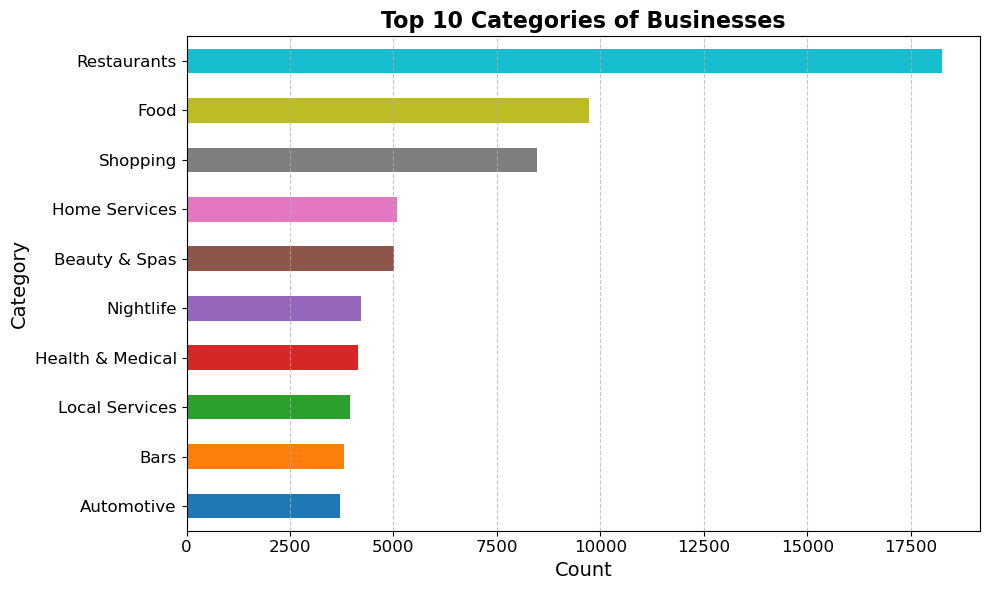

In [107]:
import matplotlib.pyplot as plt

# Calculate category counts
category_counts = df_business['categories'].str.split(', ').explode().value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(category_counts)))  # Choose colors from a predefined colormap

# Plot the bar chart with customizations
category_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Categories of Businesses', fontsize=16, fontweight='bold')  # Set title with custom font size and weight
plt.xlabel('Count', fontsize=14)  # Set x-axis label with custom font size
plt.ylabel('Category', fontsize=14)  # Set y-axis label with custom font size
plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick labels
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines with custom style and transparency
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The bar chart illustrates the distribution of businesses by category, revealing that restaurants constitute the largest proportion of opened businesses, followed by food-related establishments, shopping outlets, home services, and so forth.

<Figure size 1200x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

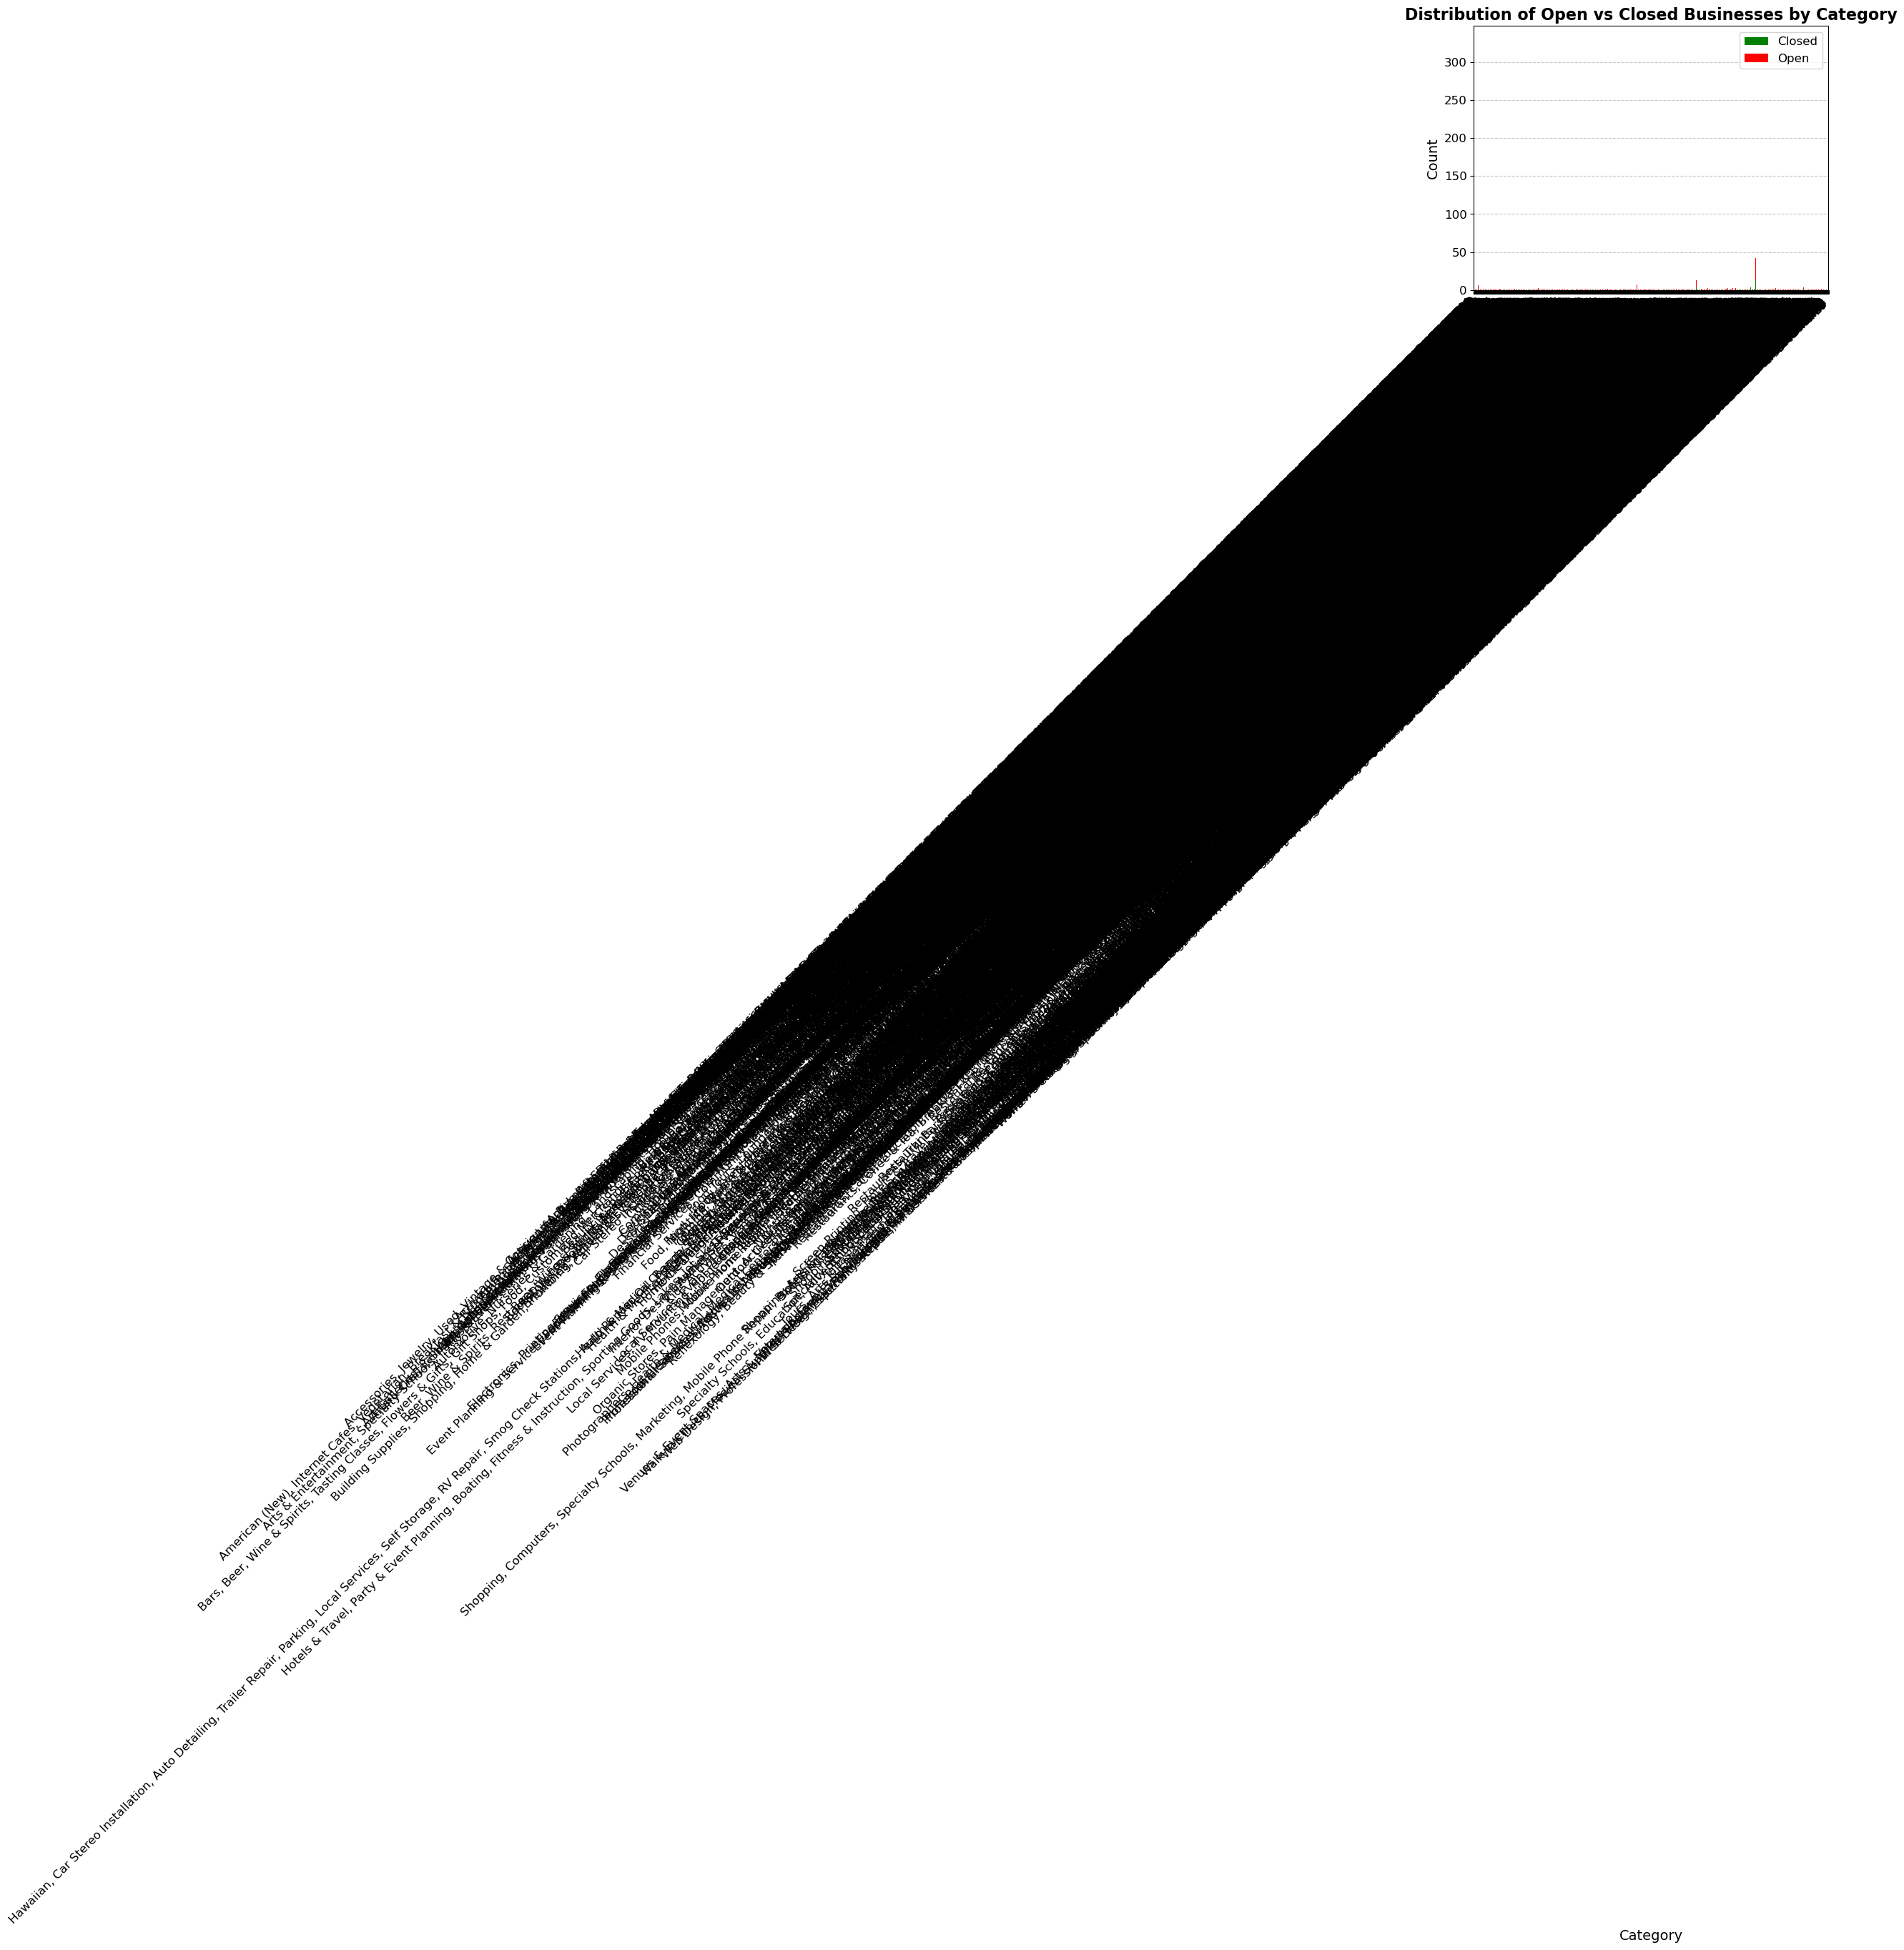

In [120]:
# Group the data by category and is_open status, and calculate the counts
category_open_closed_counts = df_business.groupby(['categories', 'is_open']).size().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(12, 8))

# Plot the bar chart with increased figure size
plt.figure(figsize=(14, 8))

# Plotting open and closed counts for each category
category_open_closed_counts.plot(kind='bar', stacked=True, color=['green', 'red'])

# Customizations
plt.title('Distribution of Open vs Closed Businesses by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Closed', 'Open'], loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot without tight layout
plt.show()


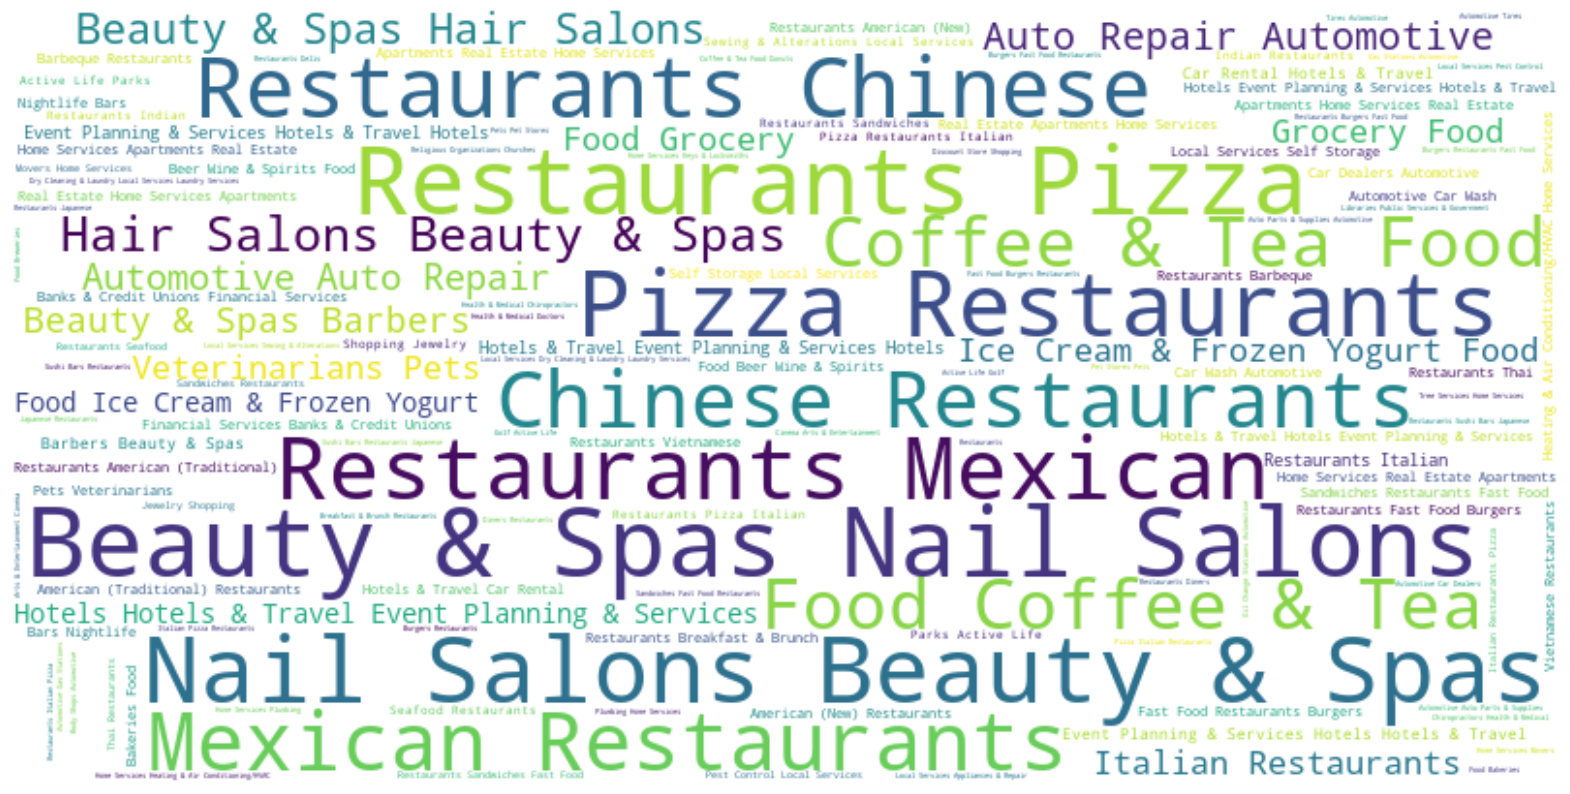

In [108]:
from wordcloud import WordCloud

# Remove commas from the categories data
categories_data = df_business['categories'].str.replace(',', '')

# Count the occurrences of each category
category_counts = categories_data.value_counts()

# Convert the category counts to a dictionary
category_dict = category_counts.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_dict)

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud highlights prominent trends in the market, indicating that pizza and Chinese restaurants are particularly prevalent, with multiple occurrences. Similarly, beauty and spas emerge as dominant categories within the industry.

In [109]:
df_business['state'].value_counts()

state
PA    11907
FL     9249
TN     4191
IN     3888
MO     3826
AZ     3479
LA     3461
NJ     2997
NV     2690
AB     1973
CA     1810
ID     1554
IL      784
DE      765
CO        3
WA        2
TX        2
NC        1
HI        1
UT        1
MT        1
Name: count, dtype: int64

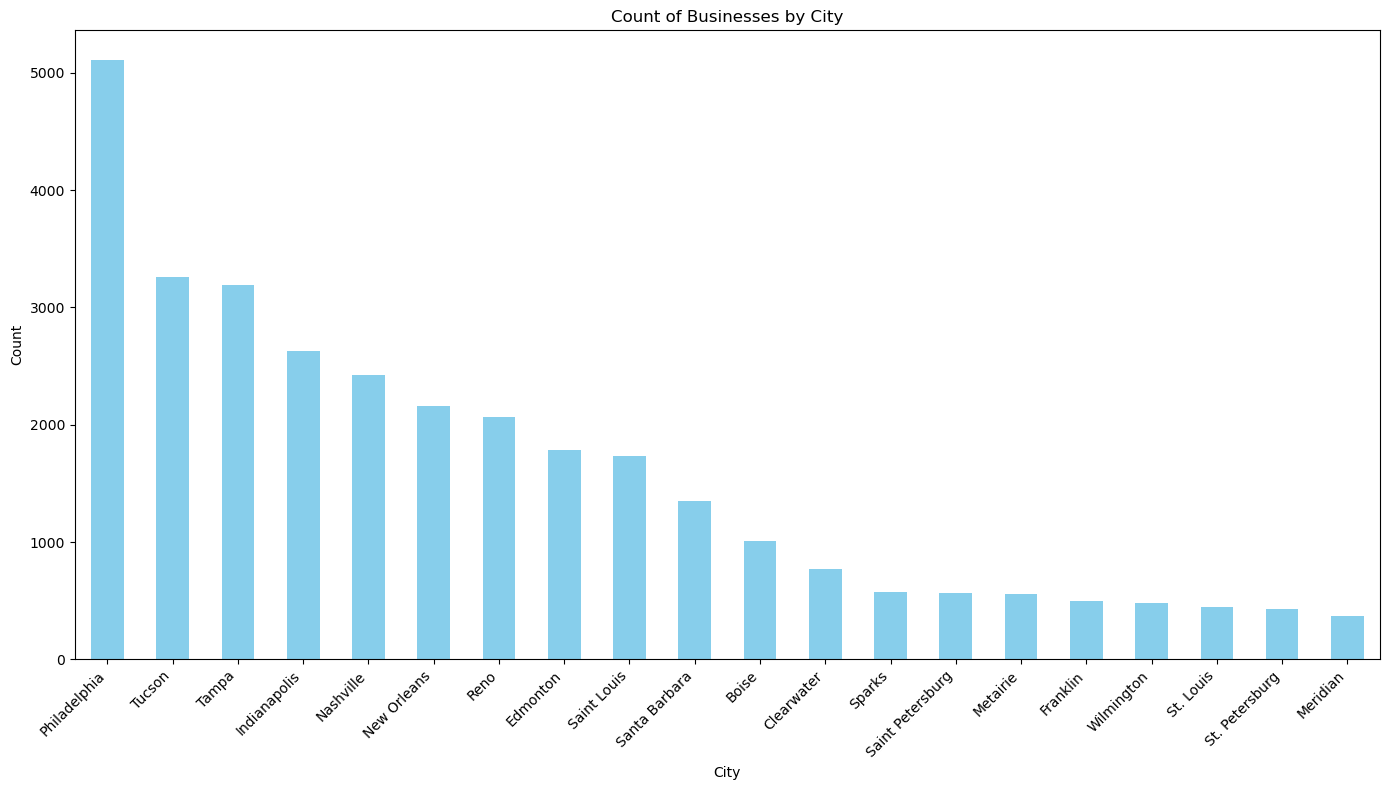

In [110]:

city_counts = df_business['city'].value_counts().head(20)  # Example: showing top 20 cities

# Creating a bar plot
plt.figure(figsize=(14, 8))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Businesses by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bar chart depicts the distribution of businesses across different locations, with Philadelphia hosting the highest number of establishments, followed by Tucson and Tampa. Conversely, Meridian, St. Petersburg, and St. Louis exhibit the lowest counts of businesses.

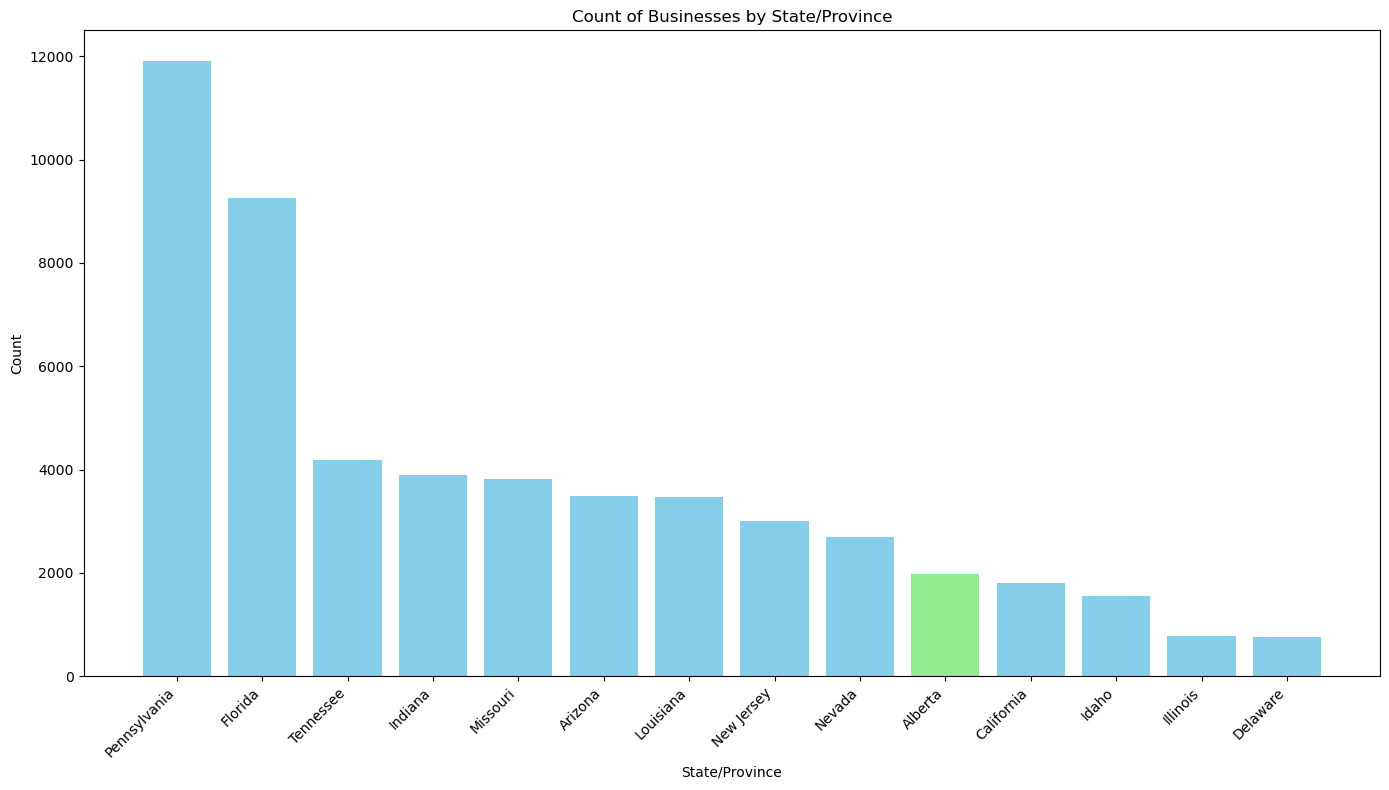

In [111]:

state_counts = df_business['state'].value_counts()

# Define full names for US states and Canadian provinces/territories
state_names = {
    'PA': 'Pennsylvania', 'FL': 'Florida', 'TN': 'Tennessee', 'IN': 'Indiana', 'MO': 'Missouri', 
    'AZ': 'Arizona', 'LA': 'Louisiana', 'NJ': 'New Jersey', 'NV': 'Nevada', 'CA': 'California', 
    'ID': 'Idaho', 'DE': 'Delaware', 'IL': 'Illinois', 'MA': 'Massachusetts', 'VI': 'Virgin Islands', 
    'VT': 'Vermont', 'AB': 'Alberta'  # Add more as needed
}

# Define colors for US states and Canadian provinces/territories
us_states = ['PA', 'FL', 'TN', 'IN', 'MO', 'AZ', 'LA', 'NJ', 'NV', 'CA', 'ID', 'DE', 'IL', 'MA', 'VI', 'VT']
us_state_color = 'skyblue'
canadian_provinces = ['AB']  # Add more Canadian provinces if needed
canadian_province_color = 'lightgreen'

# Create a bar plot
plt.figure(figsize=(14, 8))
for state, count in state_counts.items():
    if state in us_states:
        full_name = state_names[state]
        plt.bar(full_name, count, color=us_state_color)
    elif state in canadian_provinces:
        full_name = state_names[state]
        plt.bar(full_name, count, color=canadian_province_color)

plt.title('Count of Businesses by State/Province')
plt.xlabel('State/Province')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Upon examining the statewise distribution, it becomes evident that Pennsylvania, Florida, and Tennessee are the dominant regions, with notable business presence. Notably, Alberta represents the sole Canadian province included. Conversely, Delaware, Illinois, and Idaho exhibit comparatively fewer businesses

In [ ]:
df_business.iloc[0]

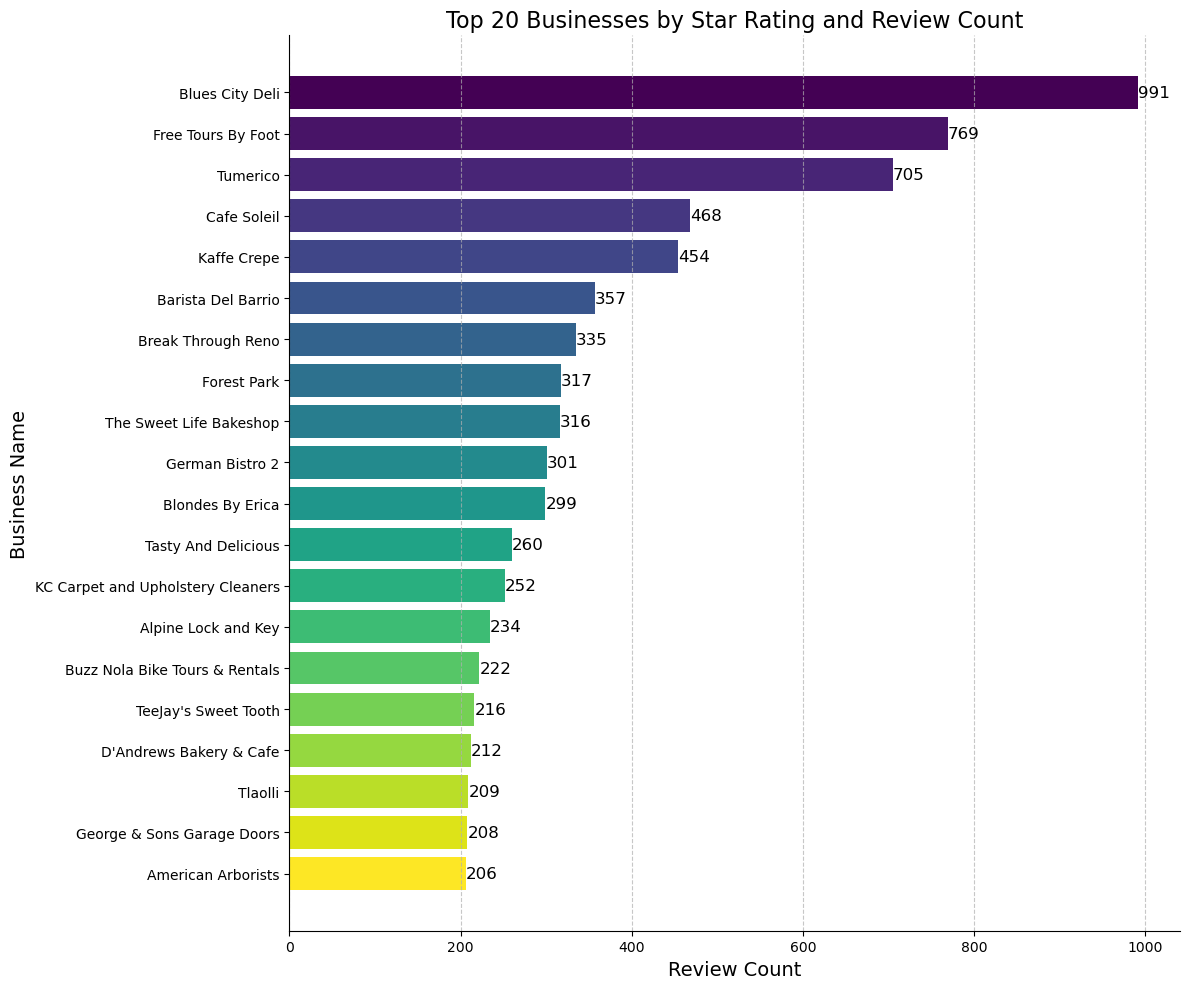

In [113]:

# Sort the dataframe by star rating and review count
sorted_businesses = df_business.sort_values(by=['stars', 'review_count'], ascending=[False, False])

# Select the top 20 businesses
top_20_businesses = sorted_businesses.head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20_businesses)))

# Plotting
bars = ax.barh(top_20_businesses['name'], top_20_businesses['review_count'], color=colors)

# Adding labels and title
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Business Name', fontsize=14)
ax.set_title('Top 20 Businesses by Star Rating and Review Count', fontsize=16)

# Adding data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, '{:,}'.format(int(width)), 
            va='center', ha='left', fontsize=12, color='black')

# Adding gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invert y-axis for better readability
ax.invert_yaxis()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


The bar chart, considering cumulative reviews and star ratings, reveals Blues City Deli as the top performer with 991 reviews, followed by Free Tours by Foot and Termerico"

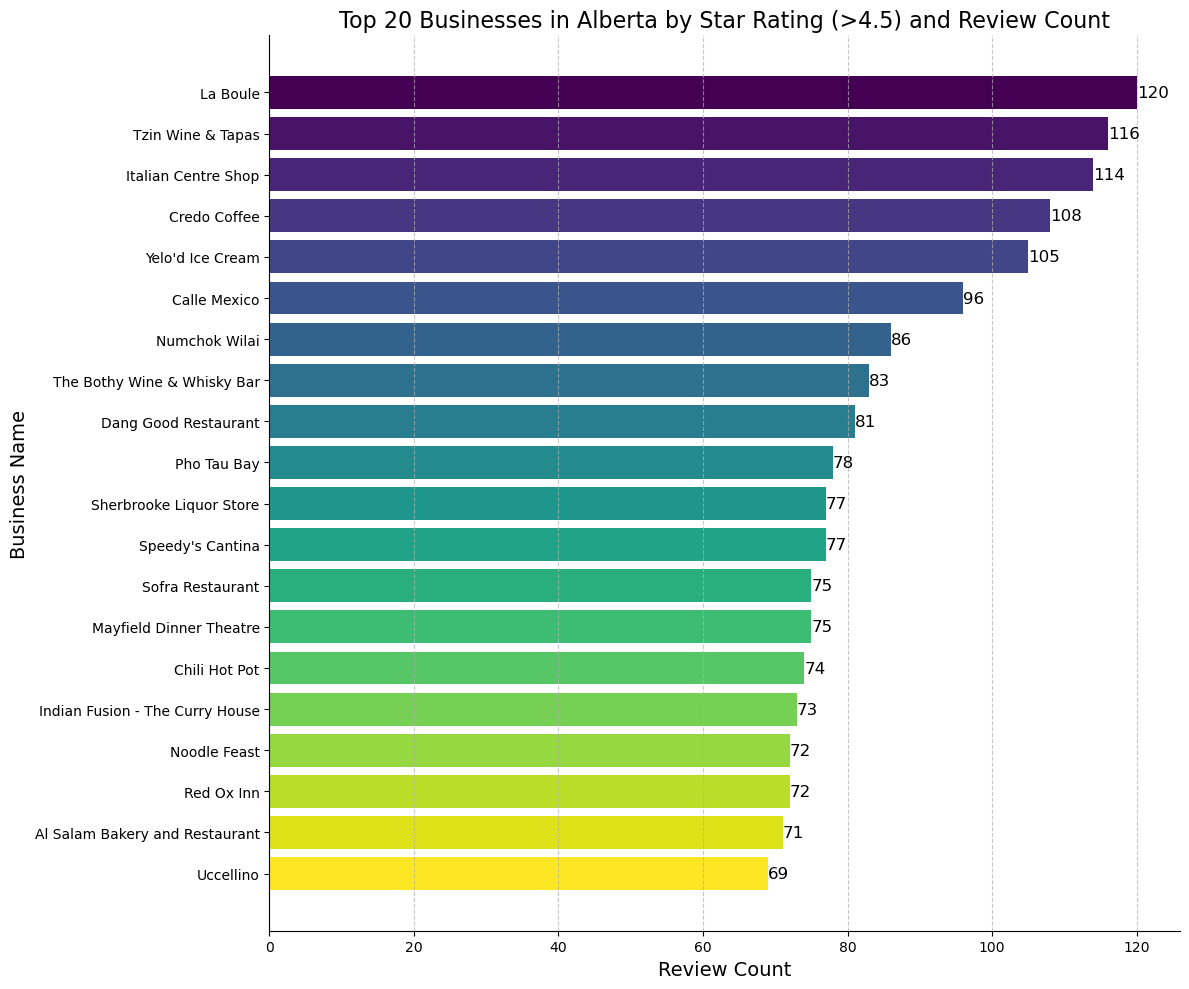

In [119]:
# Filter businesses located in Alberta with star rating greater than 4
alberta_businesses_filtered = alberta_businesses[(alberta_businesses['stars'] > 4)]

# Sort the filtered dataframe by review count and star rating
sorted_alberta_businesses_filtered = alberta_businesses_filtered.sort_values(by=['review_count', 'stars'], ascending=[False, False])

# Select the top 20 businesses
top_20_alberta_businesses_filtered = sorted_alberta_businesses_filtered.head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20_alberta_businesses_filtered)))

# Plotting
bars = ax.barh(top_20_alberta_businesses_filtered['name'], top_20_alberta_businesses_filtered['review_count'], color=colors)

# Adding labels and title
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Business Name', fontsize=14)
ax.set_title('Top 20 Businesses in Alberta by Star Rating (>4.5) and Review Count', fontsize=16)

# Adding data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, '{:,}'.format(int(width)), 
            va='center', ha='left', fontsize=12, color='black')

# Adding gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invert y-axis for better readability
ax.invert_yaxis()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


Diving deeper into businesses in Alberta, filtering by rating greater than 4 and maximum number of reviews

In [121]:

# Count the occurrences of each business name
name_counts = df_business['name'].value_counts()

# Filter businesses where the name occurs more than 5 times
chain_businesses = df_business[df_business['name'].isin(name_counts[name_counts > 5].index)]

# Display the filtered DataFrame
print(chain_businesses['name'])


1         The UPS Store
2                Target
5        Sonic Drive-In
9        Sonic Drive-In
10            Marshalls
              ...      
52584              IHOP
52599          PetSmart
52608           Labcorp
52617      Jimmy John's
52621    The Home Depot
Name: name, Length: 7319, dtype: object


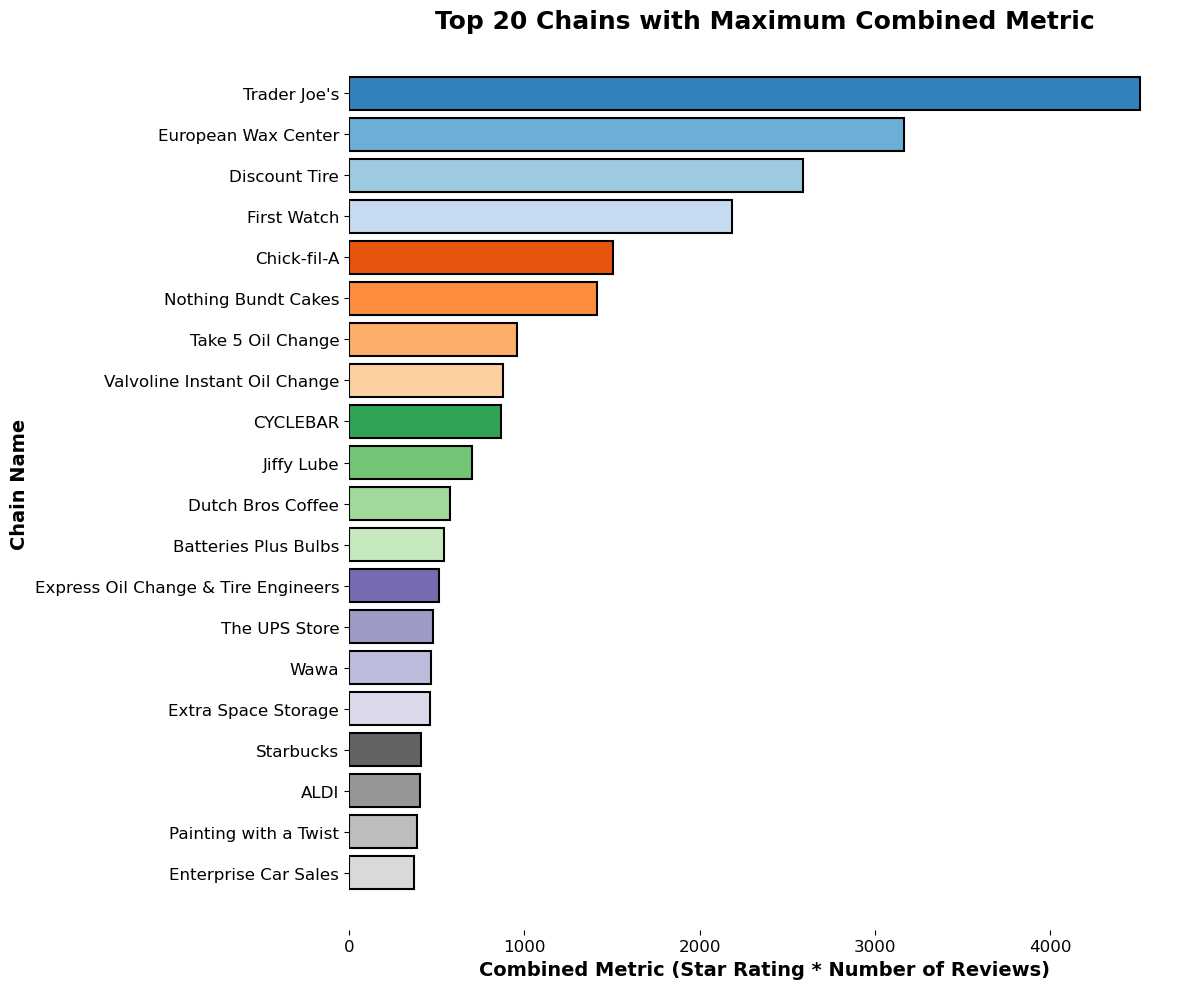

In [122]:
import matplotlib.pyplot as plt

# Filter businesses with a rating of 5
top_rated_businesses = df_business[df_business['stars'] >= 4.5]  # Adjust the rating threshold as needed

# Identify chains based on repeating names
chain_businesses = top_rated_businesses[top_rated_businesses['name'].duplicated(keep=False)]
chains = chain_businesses.groupby('name').filter(lambda x: len(x) > 3)

# Group by business name, calculate total review count and average star rating, and sort by combined metric
chain_performance = chains.groupby('name').agg({'review_count': 'sum', 'stars': 'mean'})
chain_performance['combined_metric'] = chain_performance['review_count'] * chain_performance['stars']
top_chains = chain_performance.sort_values(by='combined_metric', ascending=False).head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Define custom bar colors
bar_colors = plt.cm.tab20c(range(len(top_chains)))

# Plotting
ax.barh(top_chains.index, top_chains['combined_metric'], color=bar_colors, edgecolor='black', linewidth=1.5)

# Adding shadows to the bars
for spine in ax.spines.values():
    spine.set_visible(False)

# Adding labels and title with custom styling
ax.set_xlabel('Combined Metric (Star Rating * Number of Reviews)', fontsize=14, fontweight='bold', color='black')
ax.set_ylabel('Chain Name', fontsize=14, fontweight='bold', color='black')
ax.set_title('Top 20 Chains with Maximum Combined Metric', fontsize=18, fontweight='bold', color='black')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12, colors='black')

# Invert y-axis for better readability
ax.invert_yaxis()

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


In [123]:

chain_performance.head(20)

,review_count,stars,combined_metric
name,,,
ALDI,88,4.625000,407.000000
Advance Auto Parts,32,4.500000,144.000000
Anytime Fitness,76,4.600000,349.600000
AutoZone Auto Parts,44,4.625000,203.500000
Batteries Plus Bulbs,121,4.500000,544.500000
CYCLEBAR,184,4.714286,867.428571
Caliber Collision,51,4.714286,240.428571
Chick-fil-A,335,4.500000,1507.500000
Club Pilates,69,4.785714,330.214286


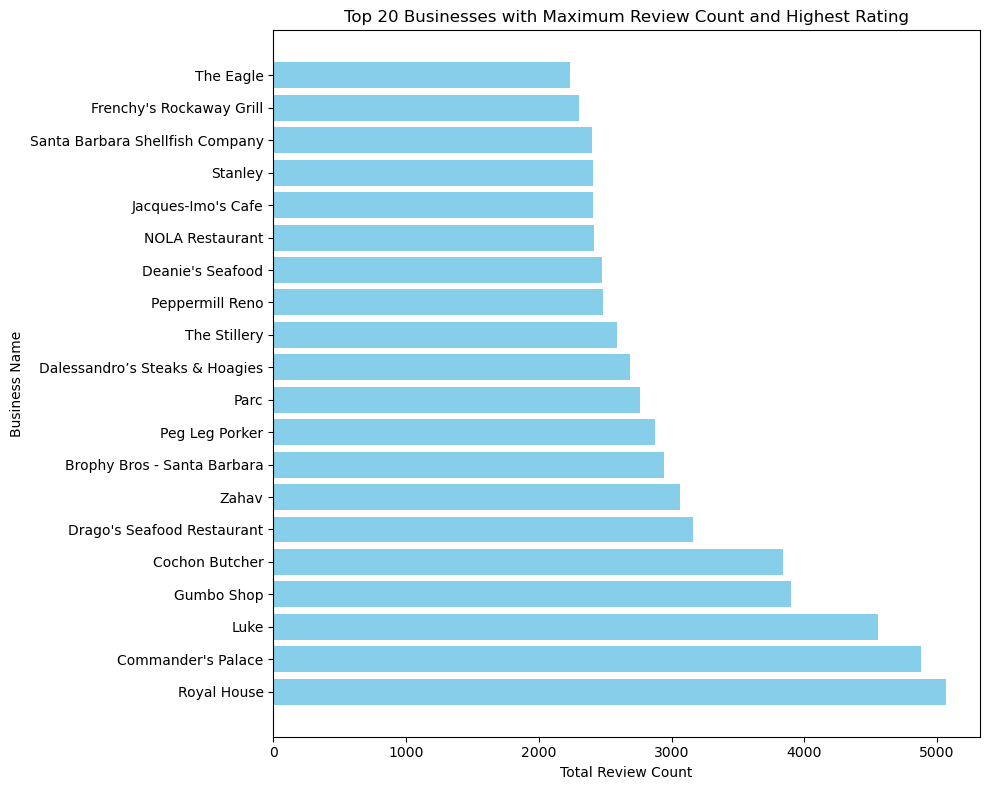

In [124]:
import matplotlib.pyplot as plt

# Filter businesses with maximum review count and rating
top_businesses = df_business.sort_values(by=['review_count', 'stars'], ascending=[False, False])

# Select top 20 businesses
top_20_businesses = top_businesses.head(20)

# Visualize top 20 businesses
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
ax.barh(top_20_businesses['name'], top_20_businesses['review_count'], color='skyblue')

# Adding labels and title
ax.set_xlabel('Total Review Count')
ax.set_ylabel('Business Name')
ax.set_title('Top 20 Businesses with Maximum Review Count and Highest Rating')

# Display the plot
plt.tight_layout()
plt.show()


In [125]:
# Identify small businesses (single-location) and large businesses (chains)
small_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep=False)
large_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep='first')

# Count the number of locations for each chain
chain_counts = df_business['name'].value_counts()

# Filter large businesses (chains) with more than three locations
large_businesses = large_businesses[large_businesses['name'].map(chain_counts) > 3]

# Get the counts of small and large businesses
count_small_businesses = len(small_businesses)
count_large_businesses = len(large_businesses)

print("Number of small businesses (single-location):", count_small_businesses)
print("Number of large businesses (chains with more than 3 locations):", count_large_businesses)


Number of small businesses (single-location): 0
Number of large businesses (chains with more than 3 locations): 636


In [126]:

# Count the number of locations for each chain
chain_counts = df_business['name'].value_counts()
chain_counts

name
McDonald's                     244
Starbucks                      238
Dunkin'                        173
Subway                         168
Taco Bell                      129
                              ... 
Good Day Eatery                  1
The City of Clayton              1
TCM Natural Health & Beauty      1
Yet Bun Chop Suey                1
Overtime Broiler & Taproom       1
Name: count, Length: 42774, dtype: int64

In [127]:
# Filter small businesses (single-location or with name repeating max twice or thrice)
small_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep=False)
small_businesses_count = len(small_businesses)
max_name_repeats = 3

# Identify small businesses with name repeating max twice or thrice
small_businesses_max_repeat = df_business[df_business['name'].duplicated(keep=False)]
small_businesses_max_repeat_count = len(small_businesses_max_repeat['name'].unique())

# Filter large businesses (chains) with more than three locations
large_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep='first')
chain_counts = df_business['name'].value_counts()
large_businesses = large_businesses[large_businesses['name'].map(chain_counts) > max_name_repeats]
large_businesses_count = len(large_businesses)

print("Number of small businesses (single-location or name repeating max twice or thrice):", small_businesses_count + small_businesses_max_repeat_count)
print("Number of large businesses (chains with more than", max_name_repeats, "locations):", large_businesses_count)


Number of small businesses (single-location or name repeating max twice or thrice): 2268
Number of large businesses (chains with more than 3 locations): 636


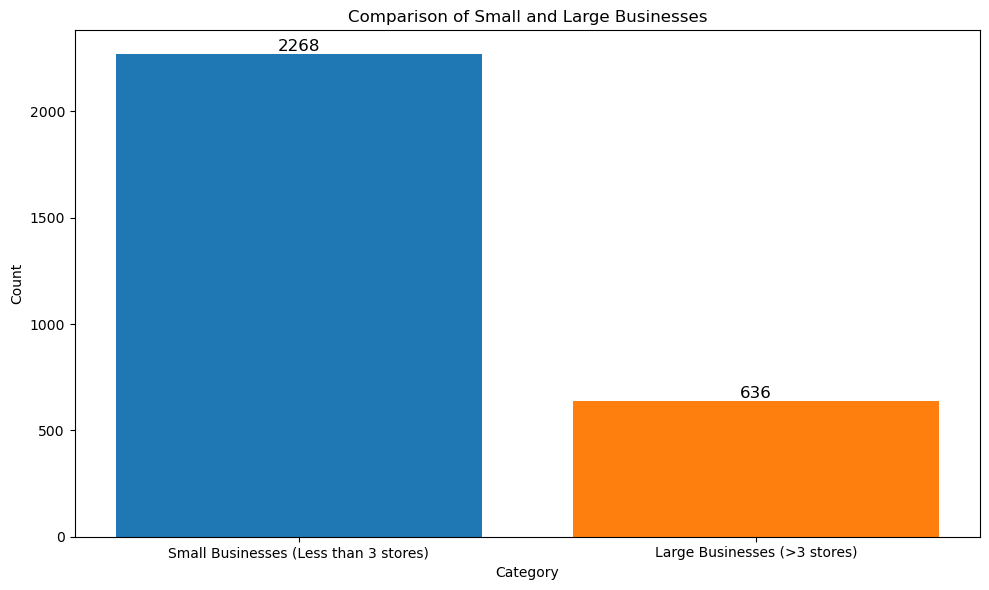

In [128]:
import matplotlib.pyplot as plt

# Define the counts and categories
counts = [small_businesses_count + small_businesses_max_repeat_count, large_businesses_count]
categories = ['Small Businesses (Less than 3 stores)', 'Large Businesses (>3 stores)']

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', color='black', fontsize=12)

# Add title and labels
plt.title('Comparison of Small and Large Businesses')
plt.xlabel('Category')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


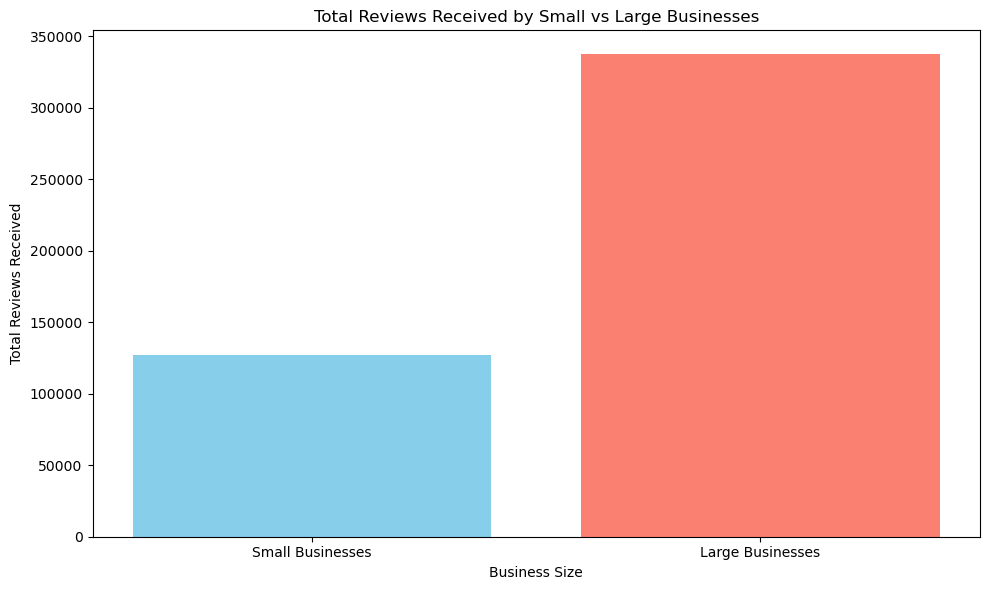

In [129]:
import matplotlib.pyplot as plt

# Calculate total review count for small businesses
total_reviews_small = df_business[df_business['name'].duplicated(keep=False) & 
                                  ~df_business['name'].duplicated(keep='first')]['review_count'].sum()

# Calculate total review count for large businesses
total_reviews_large = df_business[df_business['name'].duplicated(keep=False) & 
                                  df_business['name'].duplicated(keep='first')]['review_count'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Small Businesses', 'Large Businesses'], [total_reviews_small, total_reviews_large], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Business Size')
plt.ylabel('Total Reviews Received')
plt.title('Total Reviews Received by Small vs Large Businesses')

# Show plot
plt.tight_layout()
plt.show()


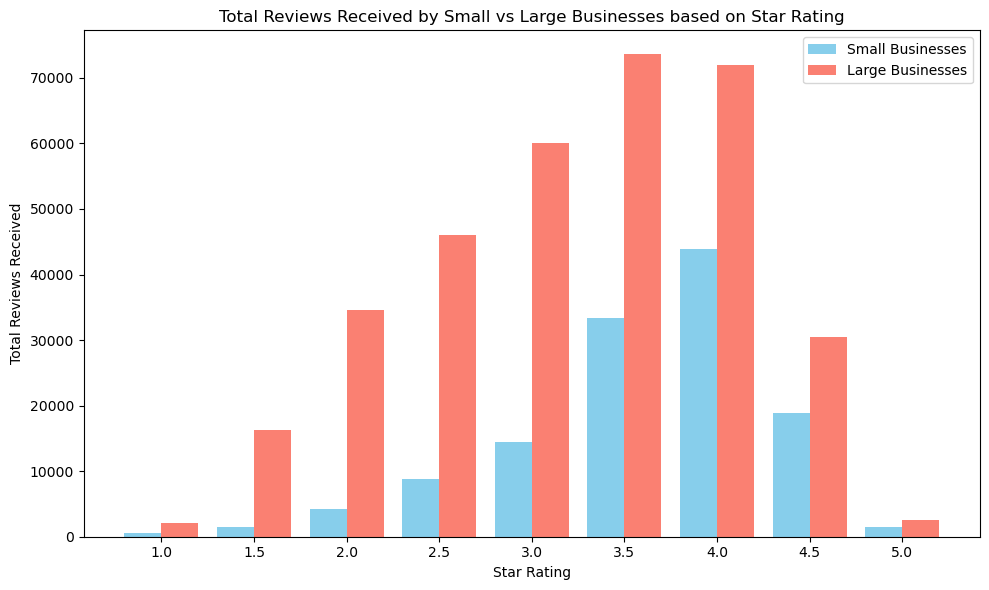

In [130]:
import matplotlib.pyplot as plt

# Calculate total review count for small businesses based on star rating
total_reviews_small_rating = df_business[df_business['name'].duplicated(keep=False) & 
                                         ~df_business['name'].duplicated(keep='first')].groupby('stars')['review_count'].sum()

# Calculate total review count for large businesses based on star rating
total_reviews_large_rating = df_business[df_business['name'].duplicated(keep=False) & 
                                         df_business['name'].duplicated(keep='first')].groupby('stars')['review_count'].sum()

# Create a bar plot for small businesses
plt.figure(figsize=(10, 6))
plt.bar(total_reviews_small_rating.index - 0.1, total_reviews_small_rating.values, width=0.2, label='Small Businesses', color='skyblue')

# Create a bar plot for large businesses
plt.bar(total_reviews_large_rating.index + 0.1, total_reviews_large_rating.values, width=0.2, label='Large Businesses', color='salmon')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Total Reviews Received')
plt.title('Total Reviews Received by Small vs Large Businesses based on Star Rating')
plt.xticks(total_reviews_small_rating.index)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


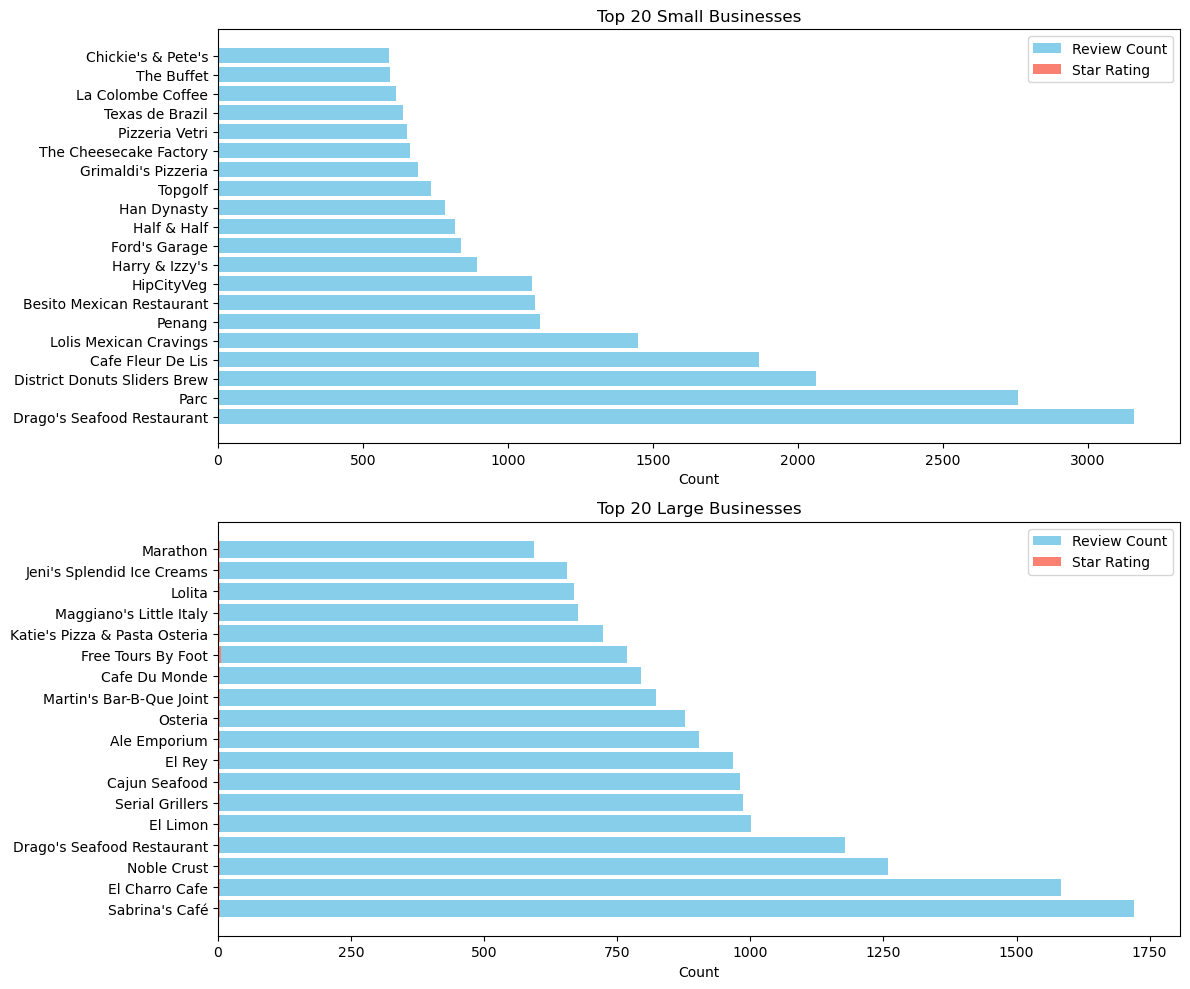

In [131]:
import matplotlib.pyplot as plt

# Get the top 20 small businesses
top_20_small_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      ~df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Get the top 20 large businesses
top_20_large_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for top 20 small businesses
axs[0].barh(top_20_small_businesses['name'], top_20_small_businesses['review_count'], color='skyblue', label='Review Count')
axs[0].barh(top_20_small_businesses['name'], top_20_small_businesses['stars'], color='salmon', label='Star Rating')
axs[0].set_xlabel('Count')
axs[0].set_title('Top 20 Small Businesses')

# Plot for top 20 large businesses
axs[1].barh(top_20_large_businesses['name'], top_20_large_businesses['review_count'], color='skyblue', label='Review Count')
axs[1].barh(top_20_large_businesses['name'], top_20_large_businesses['stars'], color='salmon', label='Star Rating')
axs[1].set_xlabel('Count')
axs[1].set_title('Top 20 Large Businesses')

# Add legends
axs[0].legend()
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


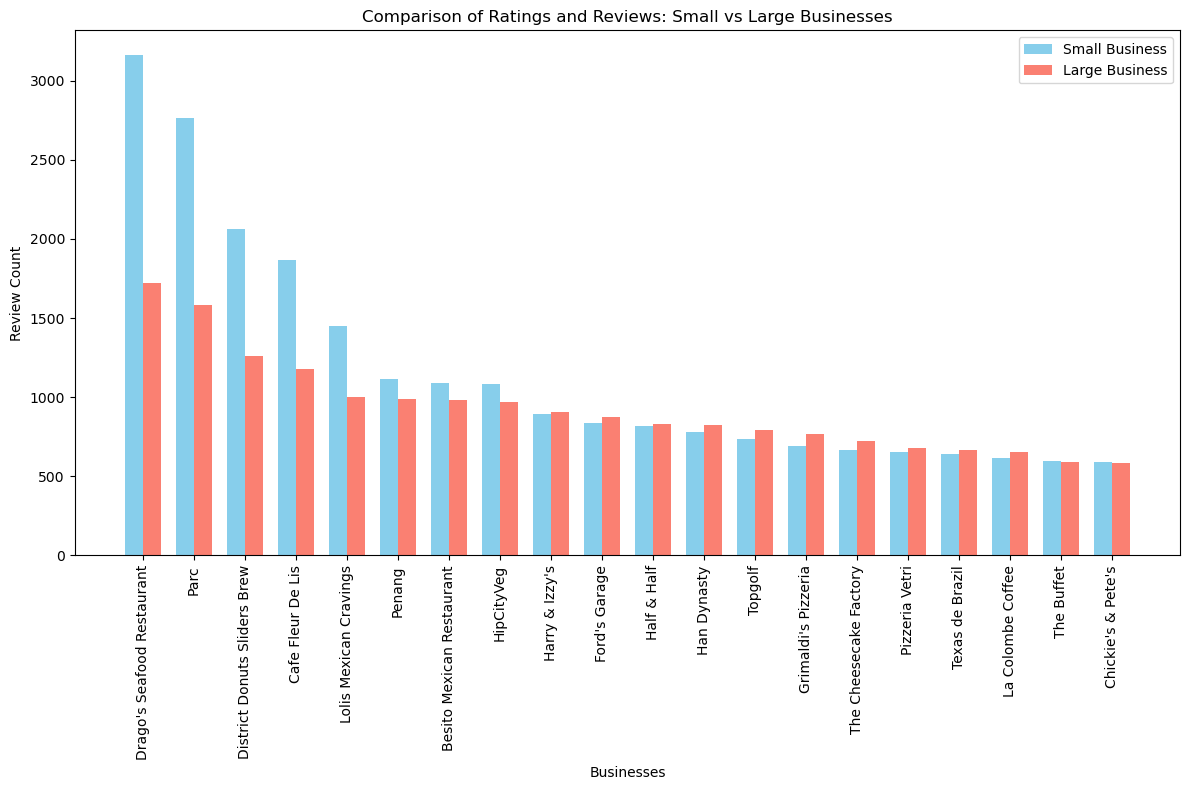

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Get the top 20 small businesses
top_20_small_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      ~df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Get the top 20 large businesses
top_20_large_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
x = np.arange(len(top_20_small_businesses))

# Plot the bars for small businesses
bars1 = ax.bar(x - bar_width/2, top_20_small_businesses['review_count'], bar_width, color='skyblue', label='Small Business')
bars2 = ax.bar(x + bar_width/2, top_20_large_businesses['review_count'], bar_width, color='salmon', label='Large Business')

# Add labels, title, and legend
ax.set_xlabel('Businesses')
ax.set_ylabel('Review Count')
ax.set_title('Comparison of Ratings and Reviews: Small vs Large Businesses')
ax.set_xticks(x)
ax.set_xticklabels(top_20_small_businesses['name'], rotation=90)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


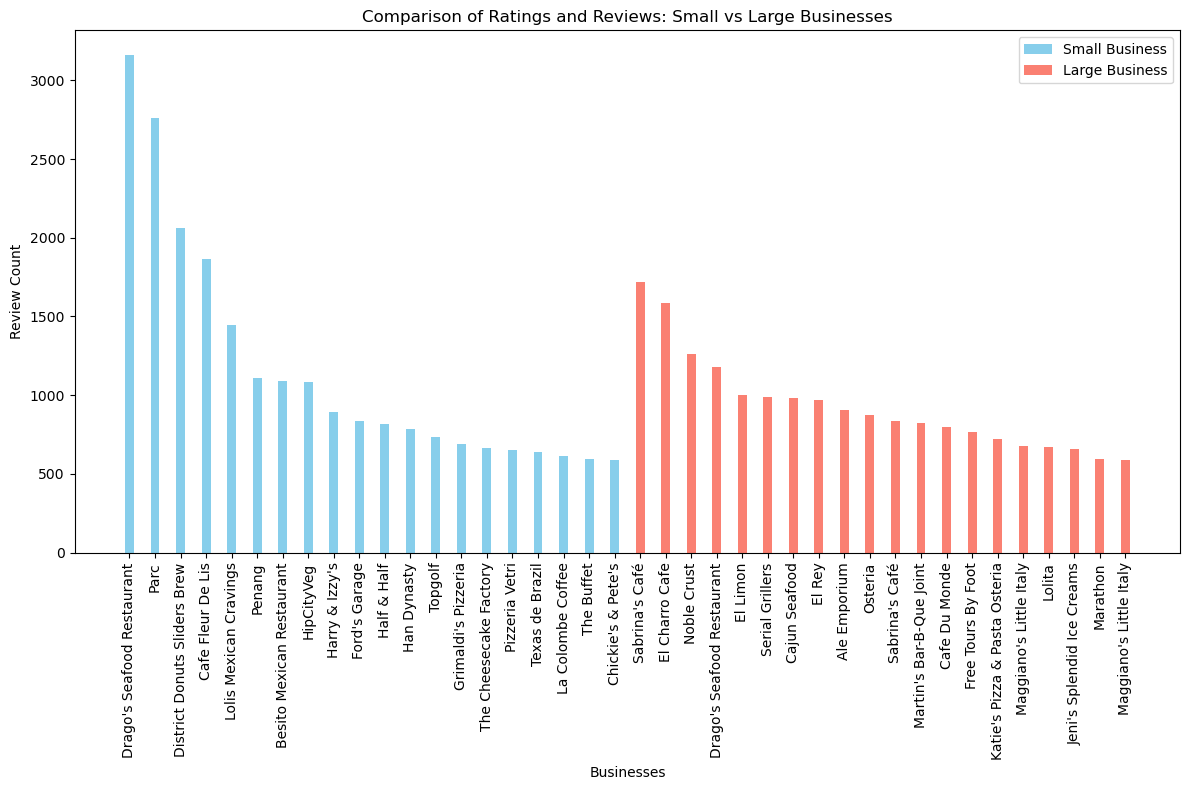

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Get the top 20 small businesses
top_20_small_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      ~df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Get the top 20 large businesses
top_20_large_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Concatenate names of both sets of businesses
business_names = np.concatenate((top_20_small_businesses['name'], top_20_large_businesses['name']))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
x = np.arange(len(business_names))

# Plot the bars for small businesses
bars1 = ax.bar(x[:len(top_20_small_businesses)], top_20_small_businesses['review_count'], bar_width, color='skyblue', label='Small Business')

# Plot the bars for large businesses
bars2 = ax.bar(x[len(top_20_small_businesses):], top_20_large_businesses['review_count'], bar_width, color='salmon', label='Large Business')

# Add labels, title, and legend
ax.set_xlabel('Businesses')
ax.set_ylabel('Review Count')
ax.set_title('Comparison of Ratings and Reviews: Small vs Large Businesses')
ax.set_xticks(x)
ax.set_xticklabels(business_names, rotation=90)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [134]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52585 entries, 0 to 52622
Columns: 923 entries, business_id to AgesAllowed
dtypes: bool(1), datetime64[ns](14), float64(58), int64(810), object(40)
memory usage: 370.4+ MB


In [135]:
df_business.iloc[0]

business_id            Pns2l4eNsfO8kk83dixA6A
name                 Abby Rappoport, LAC, CMQ
city                            Santa Barbara
state                                      CA
postal_code                             93101
                               ...           
Music                                     NaN
BestNights                                NaN
BYOBCorkage                                 0
HairSpecializesIn                         NaN
AgesAllowed                               0.0
Name: 0, Length: 923, dtype: object

In [138]:
df_business.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,RestaurantsAttire,Ambience,NoiseLevel,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,False,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,63123,38.551126,-90.335695,3.0,15,True,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,False,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,True,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,True,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0


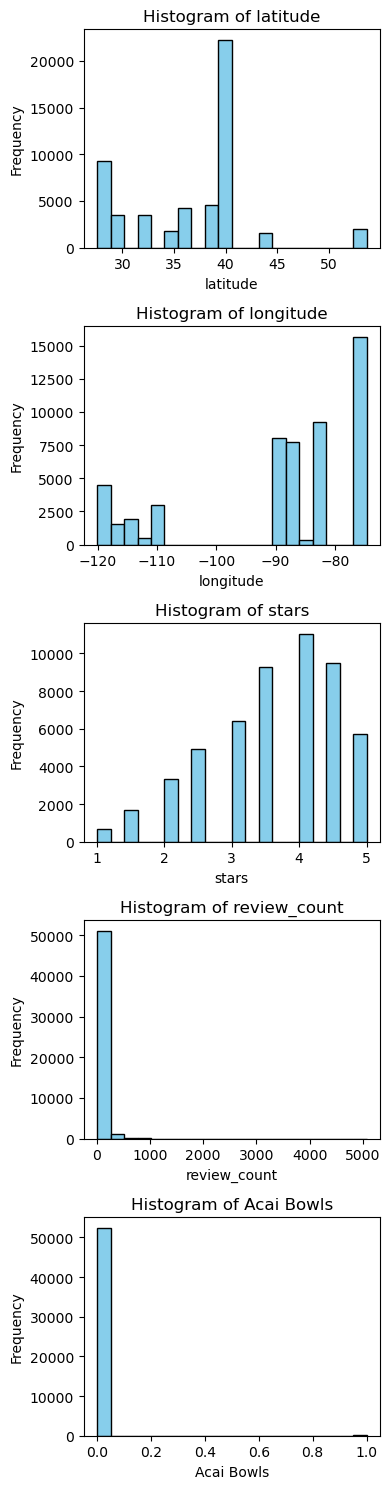

In [140]:
import matplotlib.pyplot as plt

# Select only columns of type 'number'
numeric_columns = df_business.select_dtypes(include=['number']).columns

# Select the first 10 numeric columns
numeric_columns_subset = numeric_columns[:5]

# Create subplots
num_plots = len(numeric_columns_subset)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(4, 3 * num_plots))

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns_subset):
    ax = axes[i]
    ax.hist(df_business[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Assuming df_business is your DataFrame containing numeric columns
numeric_columns = df_business.select_dtypes(include=['number', 'float'])

# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = numeric_columns.corr()

# Display corr_mat
corr_mat

In [ ]:

plt.figure(figsize=(10,7))

# creating mask of duplicated combinations
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

We dont see any correlation in the matrix between latitude, longitude, stars, review count or is open. As the coefficients are close to zero, it indicates little to no correlation between these variables.

In [ ]:
small_businesses.shape

In [ ]:
df_business=small_businesses.copy()

In [ ]:
df_business.dtypes

In [ ]:
df_business.drop(columns='name',inplace=True)


In [ ]:
# Create dummy variables for the 'name' column
#name_dummies = pd.get_dummies(df_business['name'])

# Concatenate the dummy variables with the original DataFrame
#df_with_dummies = pd.concat([df_business, name_dummies], axis=1)

# Display the DataFrame with dummy variables
#print(df_with_dummies.head())

In [ ]:
df_business.dtypes

In [ ]:
df_business = pd.merge(df_business, hours_day_df, on='business_id', how='inner')

In [ ]:
hours_day_df.head()

In [ ]:
#dropping all irrelevant columns that we have already converted
df_business.drop(columns=['business_id','attributes','categories','postal_code'],inplace=True)

In [ ]:
df_business.dtypes

In [ ]:
df_business['is_open'].value_counts()

### One Hot Encoding

In [ ]:
# Perform one-hot encoding on the 'city' column
city_encoded = pd.get_dummies(city_df['city'], prefix='city')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
city_df_encoded = pd.concat([city_df.drop(columns=['city']), city_encoded], axis=1)


### Modelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#a bunch of imports!
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')


# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(df_business.data, df_business.target, startify=y, test_size=0.4, random_state=1)

#scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#decompose
pca = PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)

#fit
rbf_svc = svm.SVC(kernel='rbf')
model = rbf_svc.fit(X_train, y_train)

print(model.score(X_train, y_train))


Modelling 
Logistic Regression:

Logistic Regression can serve as the foundational model for binary classification, where it can learn to predict the probability of a business being open or closed. It can dynamically adjust class weights or employ regularization techniques to ensure robust performance, particularly in handling imbalanced classes.

Decision Tree:

Decision trees can be instrumental in providing interpretable insights into the underlying data patterns. By recursively partitioning the feature space, they will uncover significant predictors of business openness. Techniques such as pruning will be applied to prevent overfitting, ensuring the generalization of the model to unseen data while maintaining transparency in decision-making.

XGBoost:

XGBoost plays a pivotal role as a sophisticated ensemble learning algorithm, capable of capturing complex relationships within the data. It can be extensively fine-tuned, optimizing hyperparameters like scale_pos_weight to effectively handle class imbalance. Through iterative training, XGBoost will strive to achieve superior predictive accuracy and resilience to imbalanced data distributions.

Handling Imbalance in 'is_open' Target Variable:

For imbalanced classification of 'is_open', where one class (e.g., open businesses) may be significantly more prevalent than the other (e.g., closed businesses), several strategies can be applied: Resampling Techniques: Use techniques like oversampling (e.g., SMOTE), undersampling, or a combination of both to balance the class distribution.
Algorithmic Approaches: Algorithms like XGBoost, decision trees, and random forests often provide parameters to adjust class weights or explicitly handle class imbalance.
Ensemble Methods: Ensemble techniques like bagging and boosting can help improve the model's performance on imbalanced data by combining predictions from multiple models trained on balanced subsets.
Evaluation Metrics: Instead of accuracy, consider using evaluation metrics like precision, recall, F1-score, or area under the ROC curve (ROC-AUC) to assess the model's performance, especially in the context of class imbalance.

To be Continued...